In [1]:
##import required packages

import pandas as pd
from xgboost import plot_importance
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore')


### Reading clusterwise labelled data

Note: The classes were predicted by dropping the features with high correlation values and then the predicted labels were added to the original data with all coulumns 

In [2]:
c2=pd.read_csv("../data/Clustering labelled data/2_cluster.csv").drop('Unnamed: 0',axis=1)
c3=pd.read_csv("../data/Clustering labelled data/3_cluster.csv").drop('Unnamed: 0',axis=1)
c4=pd.read_csv("../data/Clustering labelled data/4_cluster.csv").drop('Unnamed: 0',axis=1)
c5=pd.read_csv("../data/Clustering labelled data/5_cluster.csv").drop('Unnamed: 0',axis=1)
c6=pd.read_csv("../data/Clustering labelled data/6_cluster.csv").drop('Unnamed: 0',axis=1)

# Clusters =2
    

The number of entries per class are:
0    1952
1    1148
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


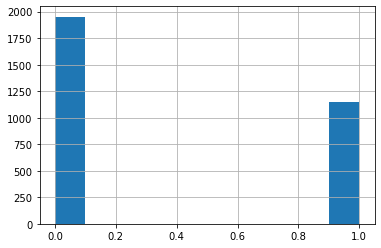

In [3]:
print("The number of entries per class are:\n{}".format(c2['class'].value_counts()),c2['class'].hist())

In [4]:
X1=c2.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c2['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c2[X1.columns[(selector.get_support())]]
print("Top features are\n{}".format(X_red.columns.to_list()))

Top features are
['Deaths', 'Years of Potential Life Lost Rate', 'Life Expectancy', '% Adults with Diabetes', 'Drug Overdose Mortality Rate', 'Population', '% Asian', 'internet_consumer', 'internet_nonconsumer', 'internet_hhs']


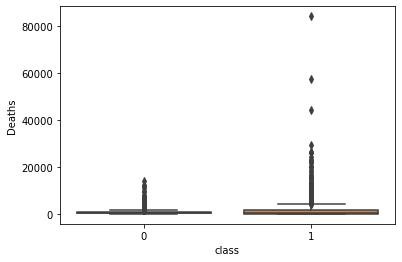

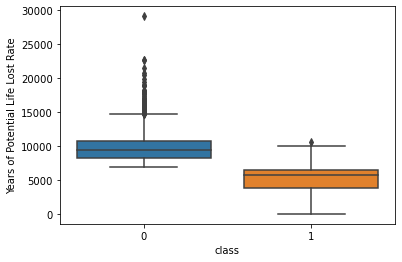

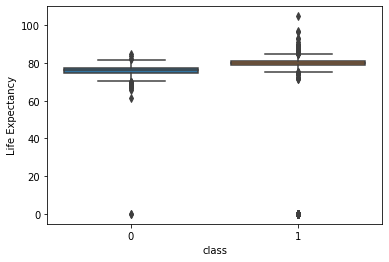

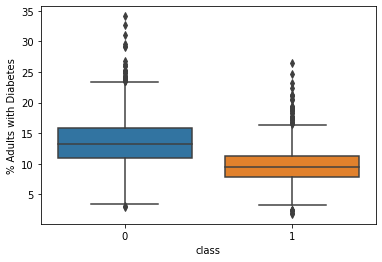

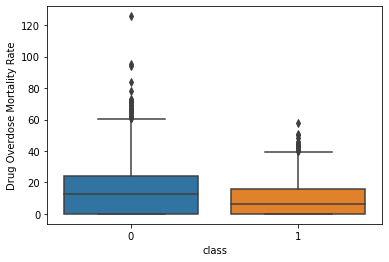

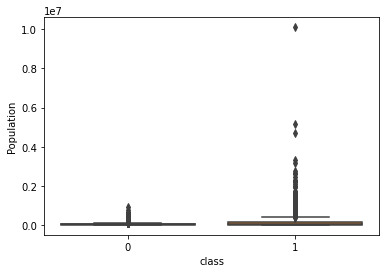

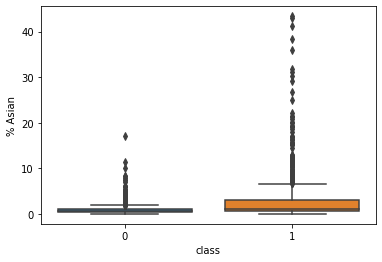

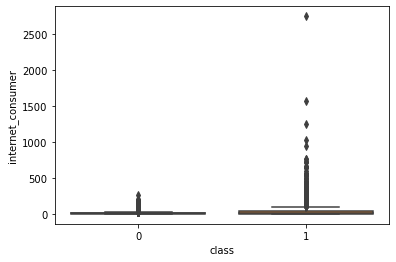

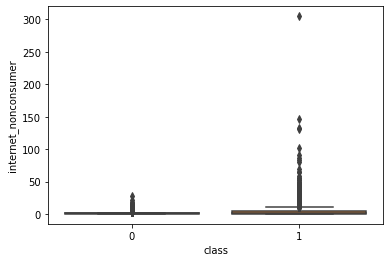

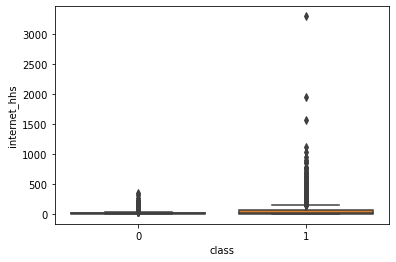

In [5]:
## Boxplots

for i in X_red.columns:
    plt.figure()
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

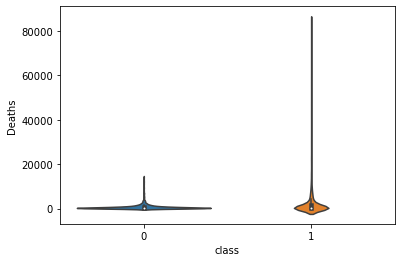

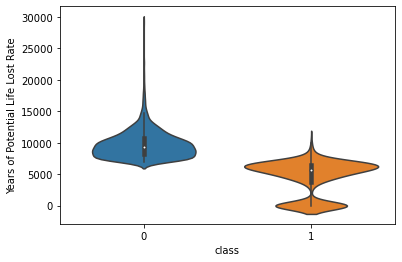

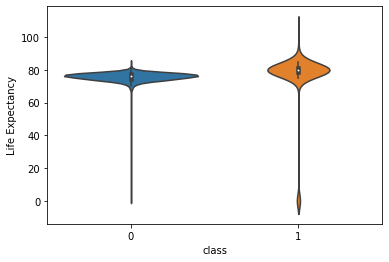

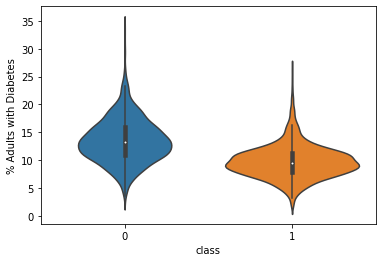

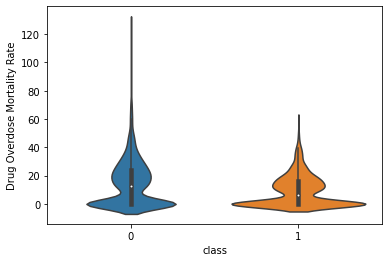

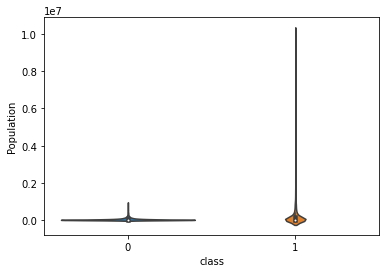

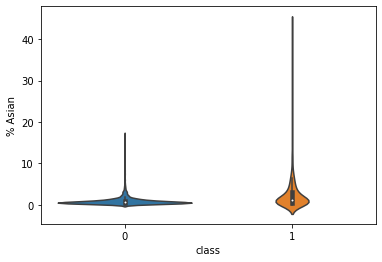

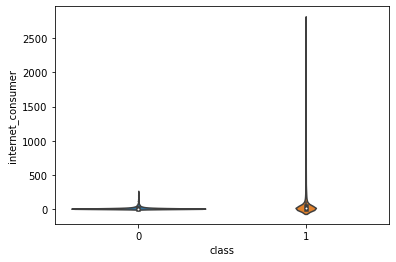

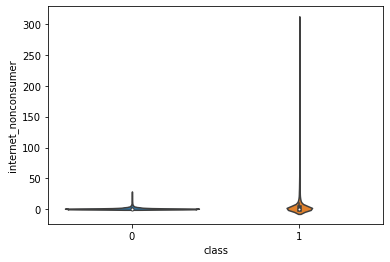

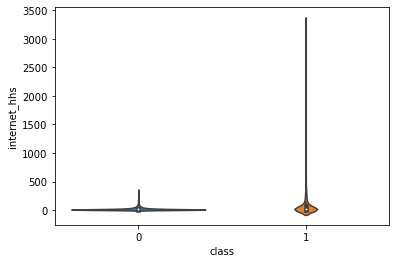

In [6]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st Cluster 

1    1952
0    1148
Name: class, dtype: int64
Top features are

Deaths
internet_hhs
internet_nonconsumer
internet_consumer
% Asian
Population
% Adults with Diabetes
Life Expectancy
Drug Overdose Mortality Rate
Years of Potential Life Lost Rate


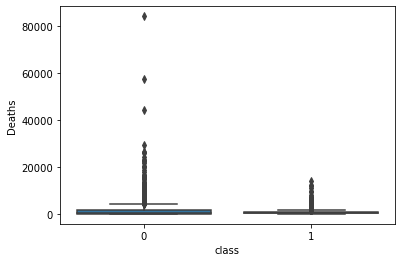

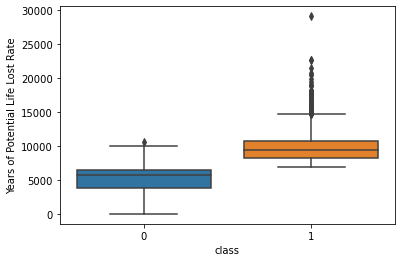

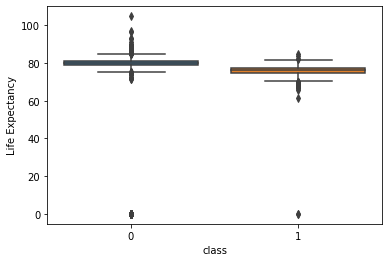

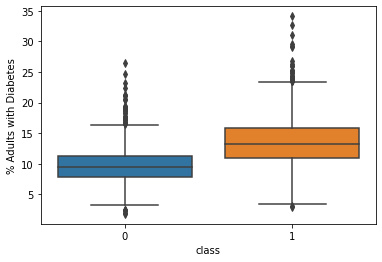

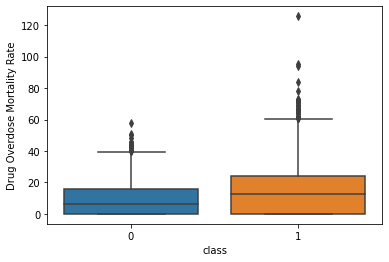

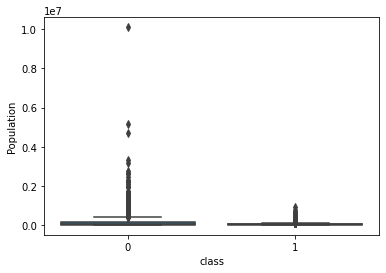

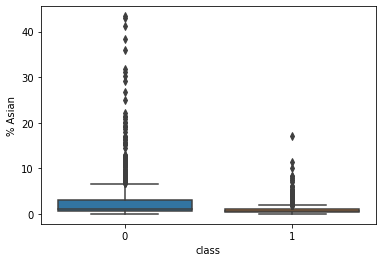

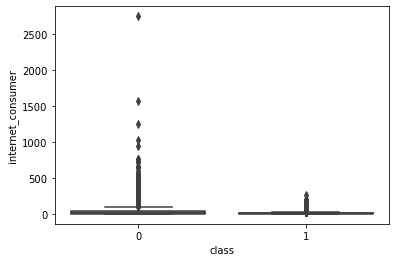

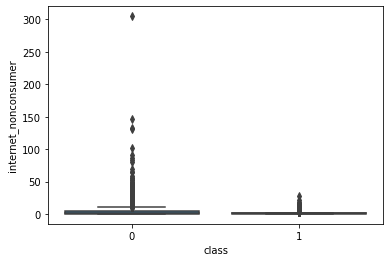

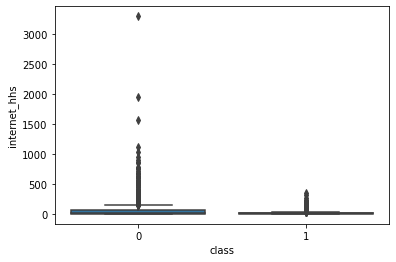

In [7]:
data1=c2[c2['class']==0]
data1_bar=c2[c2['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c21=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c21['class'].value_counts())

X=c21.drop(['class'],axis=1)
y=c21['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c2[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    1148
0    1148
Name: class, dtype: int64
Top features are

Deaths
Life Expectancy
internet_consumer
Population
internet_hhs
% Adults with Diabetes
internet_nonconsumer
Years of Potential Life Lost Rate
covid_cases
Income Ratio


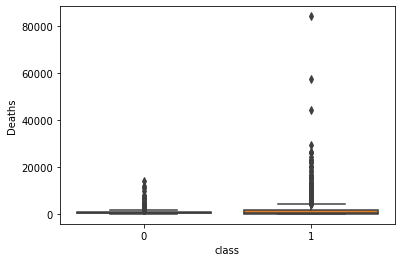

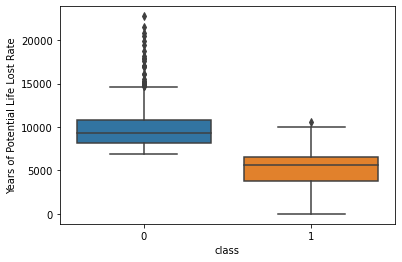

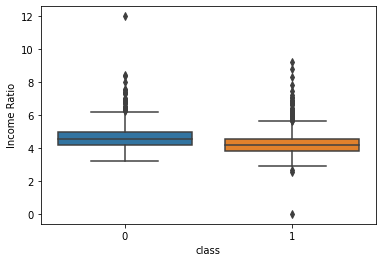

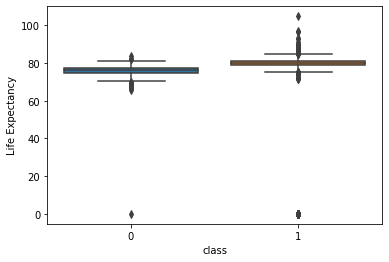

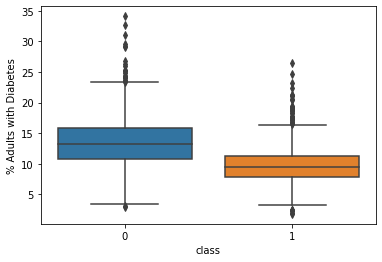

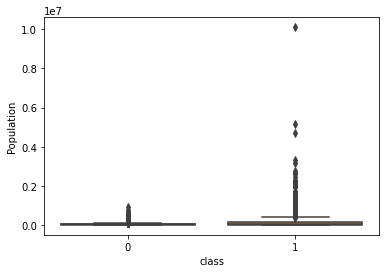

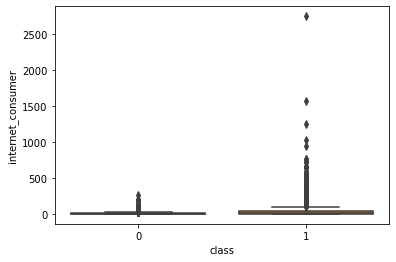

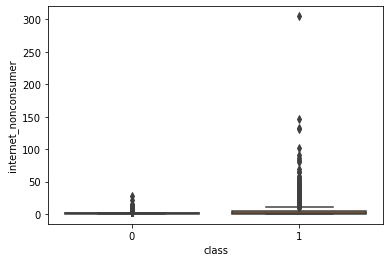

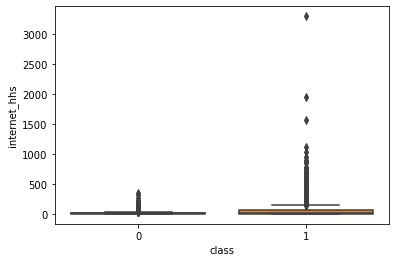

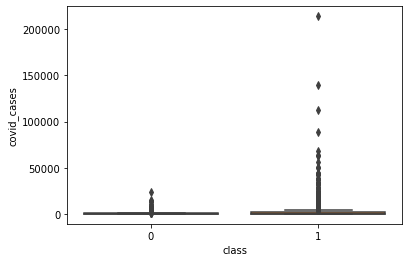

In [8]:
data1=c2[c2['class']==1]
data1_bar=c2[c2['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c22=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c22['class'].value_counts())

X=c22.drop(['class'],axis=1)
y=c22['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c2[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

# Clusters = 3


The number of entries per class are:
0    1868
2    1157
1      75
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


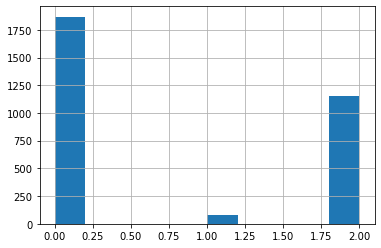

In [9]:
print("The number of entries per class are:\n{}".format(c3['class'].value_counts()),c3['class'].hist())

In [10]:
X1=c3.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c3['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c3[X1.columns[(selector.get_support())]]
print("Top features are\n{}".format(X_red.columns.to_list()))

Top features are
['Deaths', 'Years of Potential Life Lost Rate', '% With Access to Exercise Opportunities', '% Driving Deaths with Alcohol Involvement', 'Infant Mortality Rate', '% Uninsured', 'internet_consumer', 'internet_all', 'internet_hhs', 'internet_ratio']


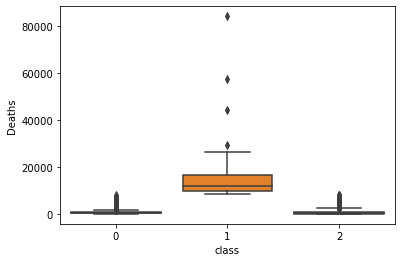

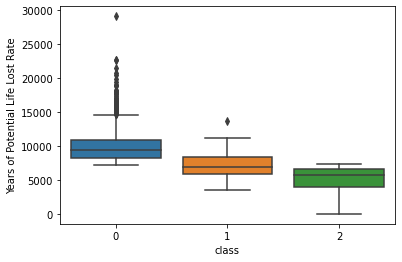

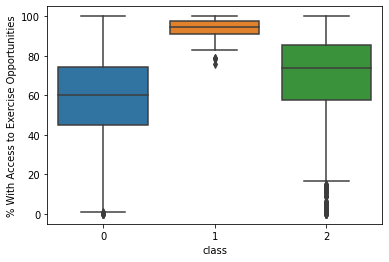

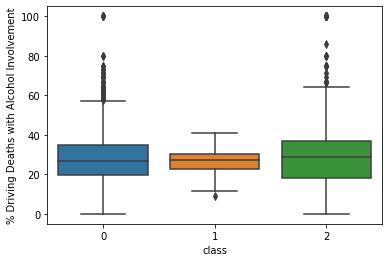

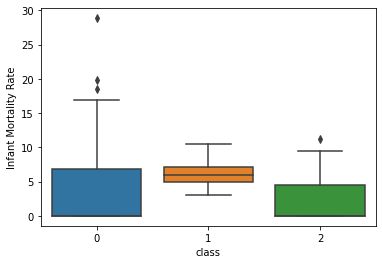

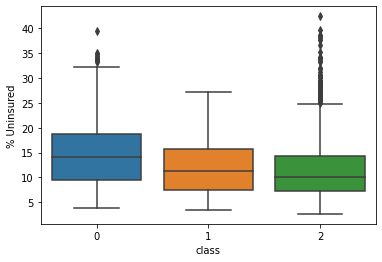

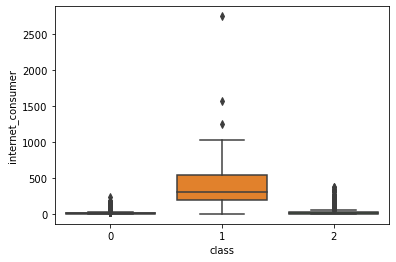

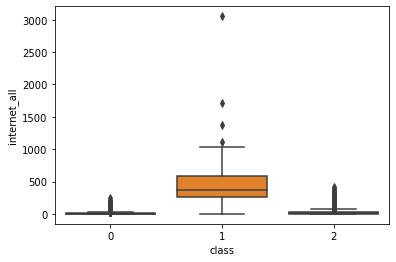

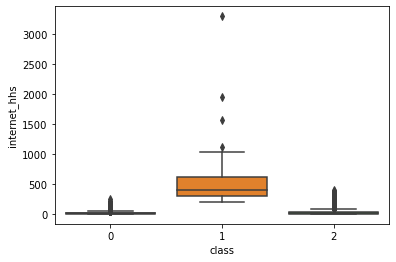

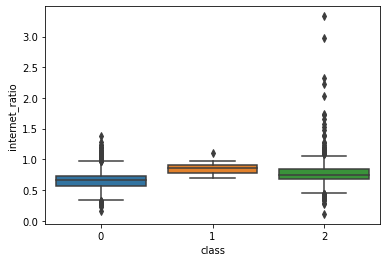

In [11]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

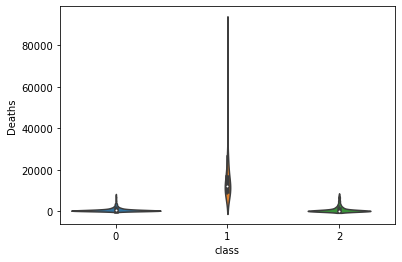

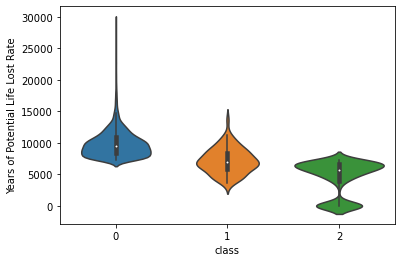

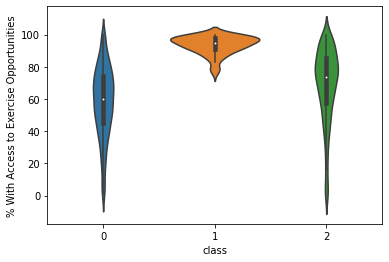

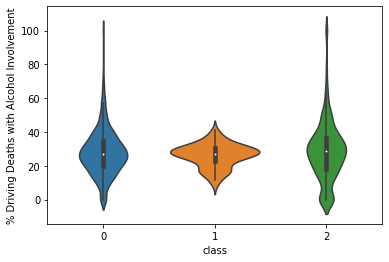

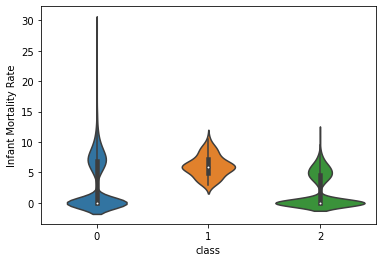

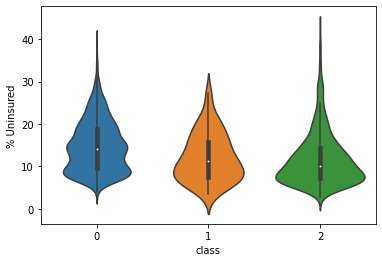

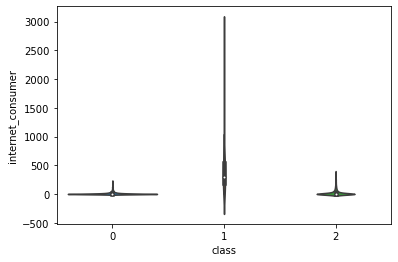

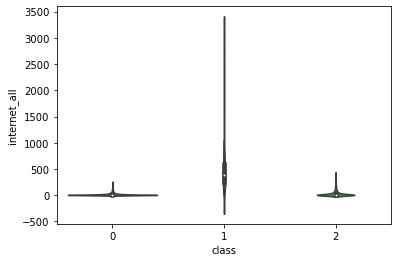

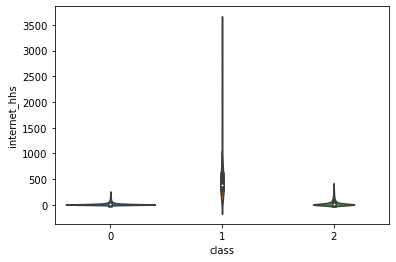

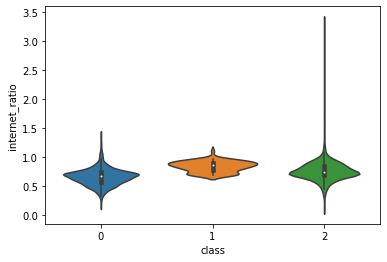

In [12]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1868
0    1232
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
covid_cases
internet_ratio
internet_hhs
internet_all
internet_nonconsumer
HIV Prevalence Rate
Motor Vehicle Mortality Rate
% Uninsured


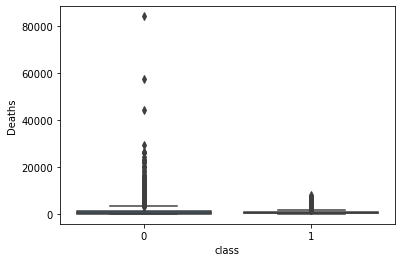

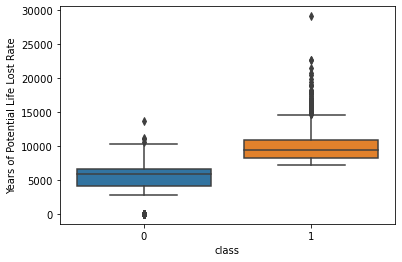

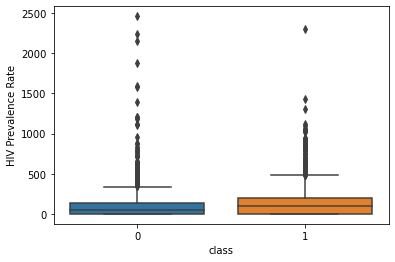

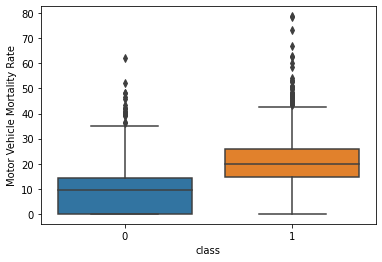

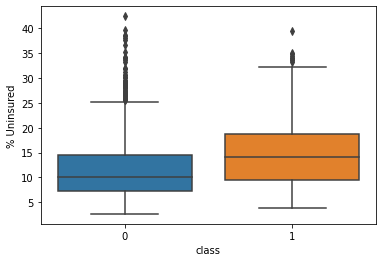

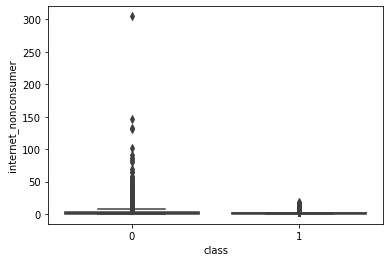

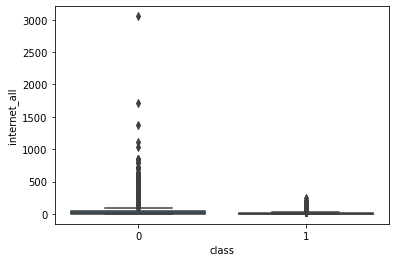

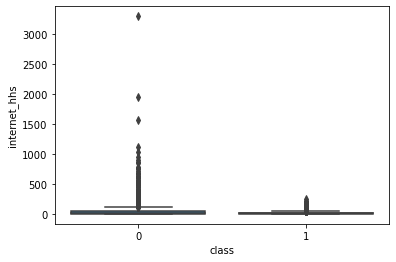

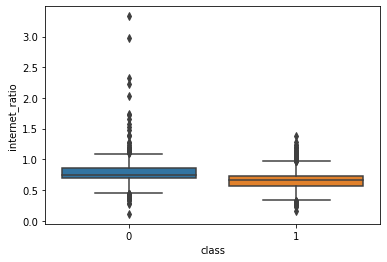

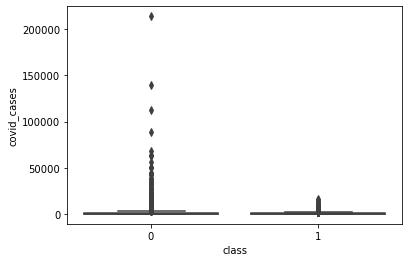

In [13]:
data1=c3[c3['class']==0]
data1_bar=c3[c3['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c31=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c31['class'].value_counts())

X=c31.drop(['class'],axis=1)
y=c31['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c3[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    75
0    75
Name: class, dtype: int64
Top features are

Deaths
%  Adults with Obesity
internet_percent
covid_deaths
covid_cases
internet_ratio
internet_hhs
Heart Disease Death Rate
Hypertension Death Rate
Food Environment Index


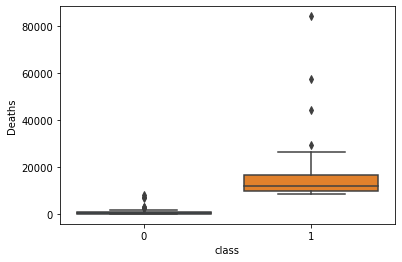

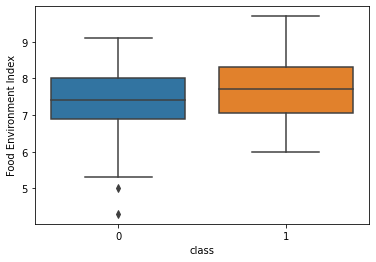

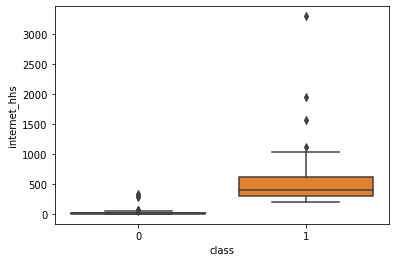

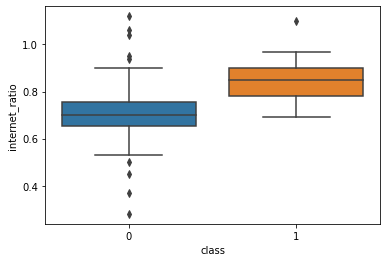

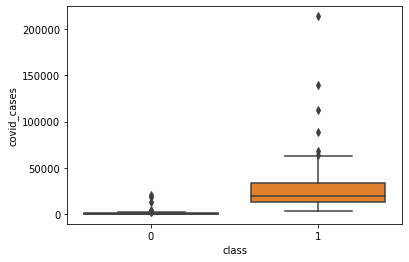

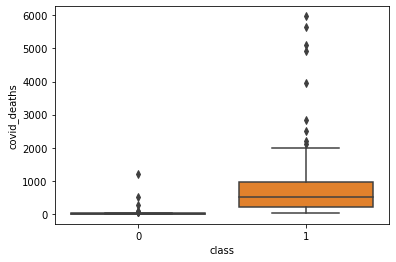

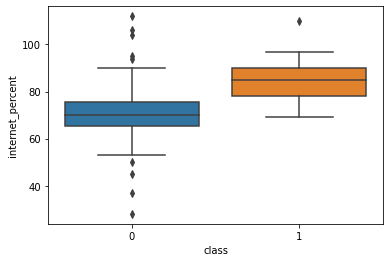

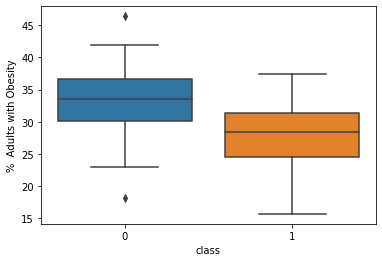

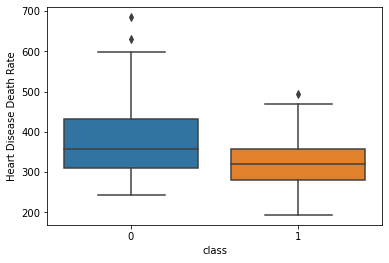

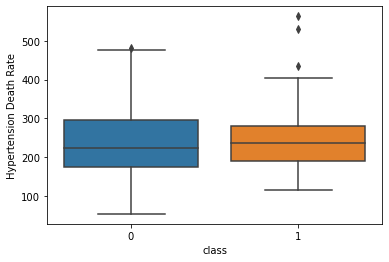

In [14]:
data1=c3[c3['class']==1]
data1_bar=c3[c3['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c32=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c32['class'].value_counts())

X=c32.drop(['class'],axis=1)
y=c32['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c3[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    1157
0    1157
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
internet_ratio
internet_consumer
% Not Proficient in English
Population
% Uninsured
% Food Insecure
Violent Crime Rate
% With Annual Mammogram


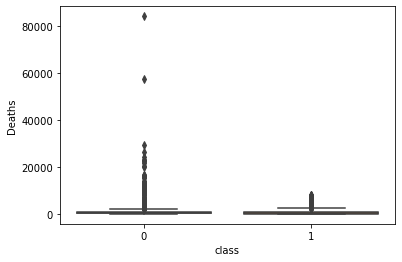

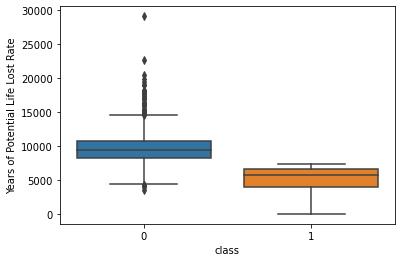

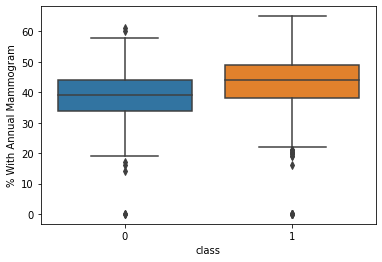

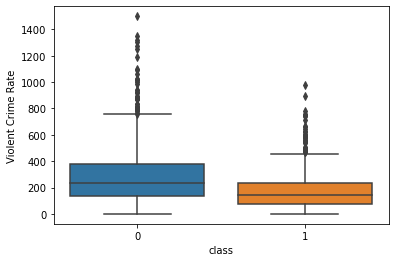

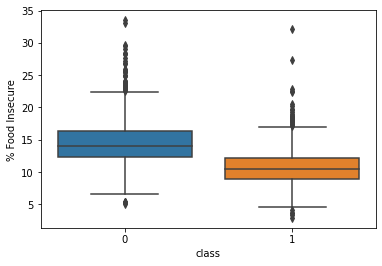

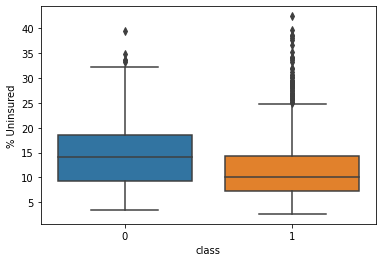

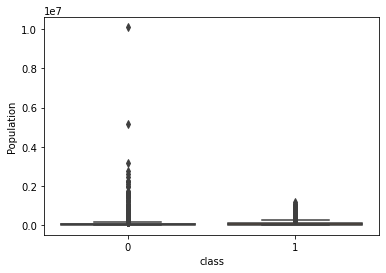

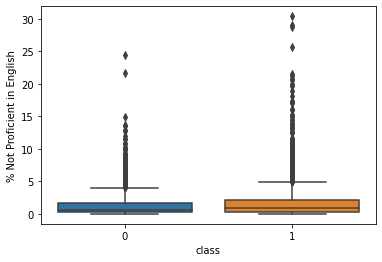

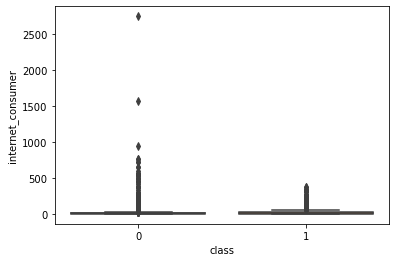

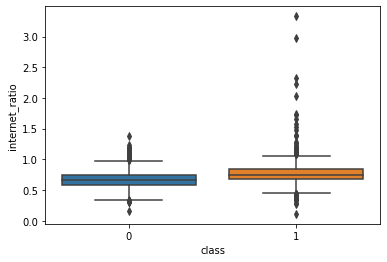

In [15]:
data1=c3[c3['class']==2]
data1_bar=c3[c3['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c33=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c33['class'].value_counts())

X=c33.drop(['class'],axis=1)
y=c33['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c3[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

# Clusters = 4


The number of entries per class are:
1    1620
0    1133
3     278
2      69
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


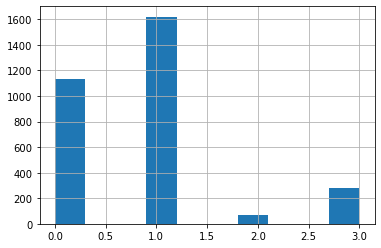

In [16]:
print("The number of entries per class are:\n{}".format(c4['class'].value_counts()),c4['class'].hist())

In [17]:
X1=c4.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c4['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c4[X1.columns[(selector.get_support())]]
print("Top features are\n{}".format(X_red.columns.to_list()))

Top features are
['Deaths', 'Years of Potential Life Lost Rate', 'Injury Death Rate', 'Child Mortality Rate', 'Population', '% Black', '% Non-Hispanic White', 'internet_consumer', 'internet_all', 'internet_hhs']


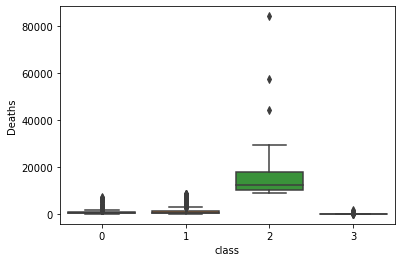

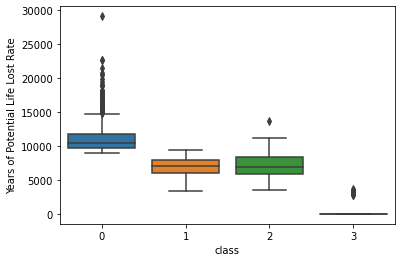

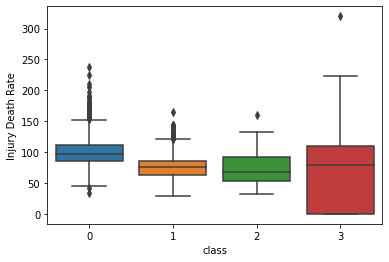

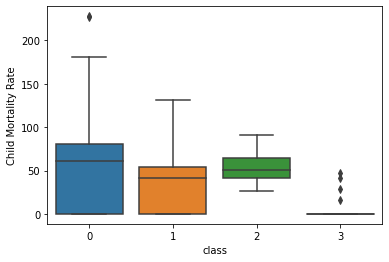

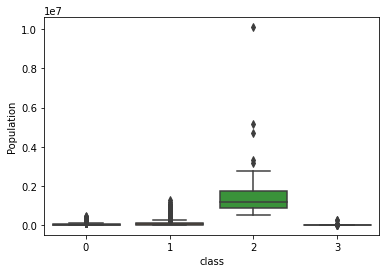

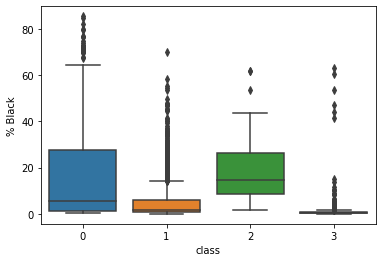

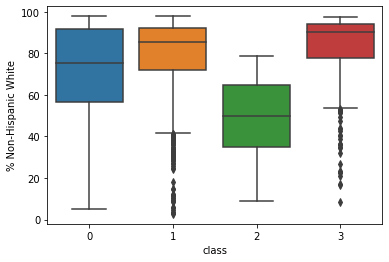

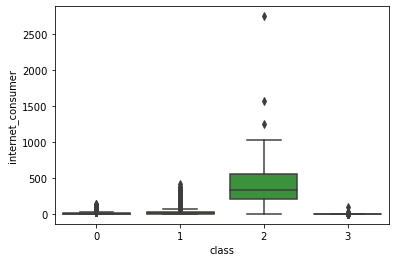

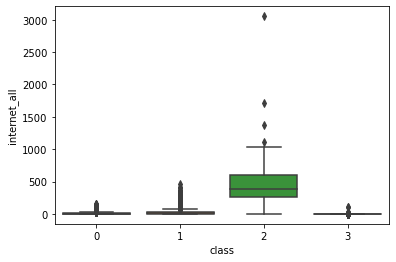

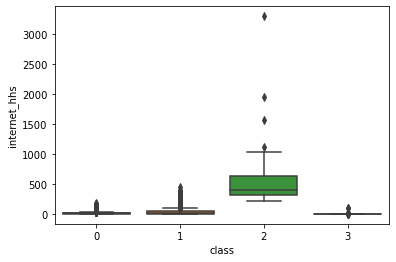

In [18]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

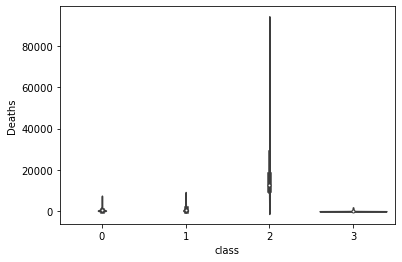

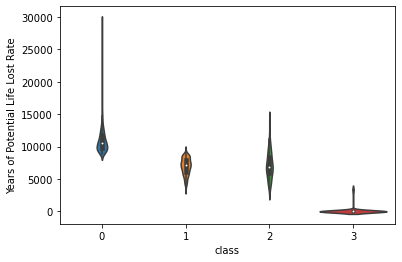

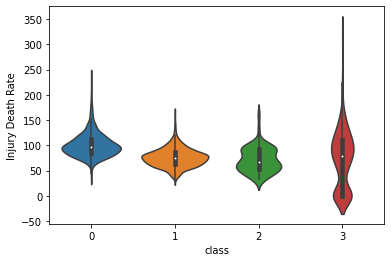

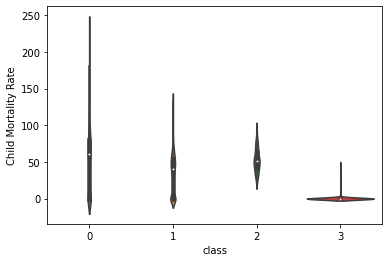

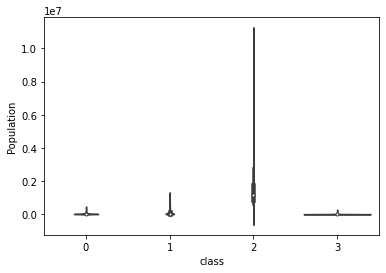

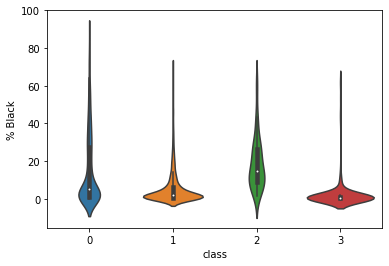

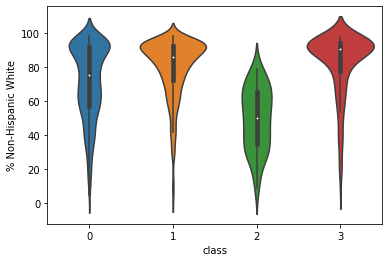

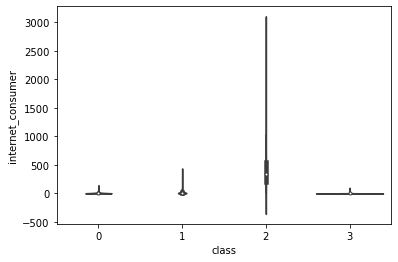

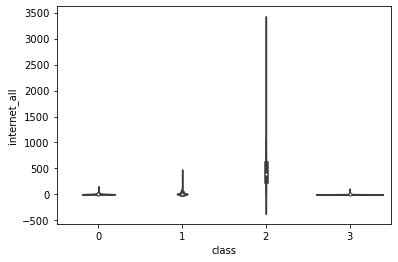

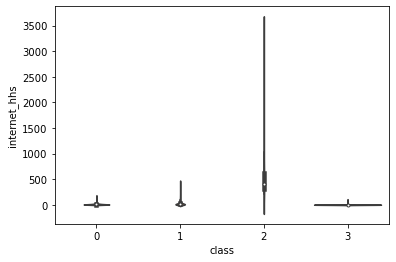

In [19]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1133
0    1133
Name: class, dtype: int64
Top features are

Deaths
internet_all
Life Expectancy
% Children in Poverty
% Unemployed
Population
% Not Proficient in English
% Physically Inactive
internet_hhs
Years of Potential Life Lost Rate


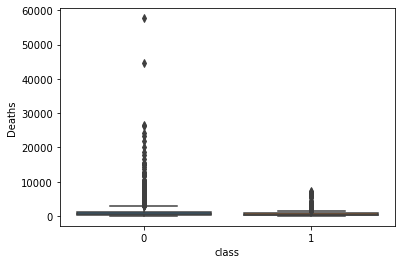

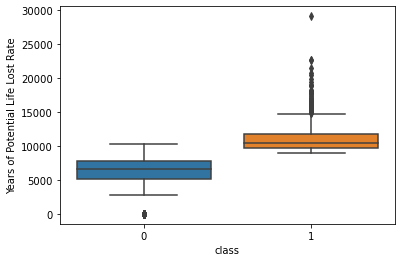

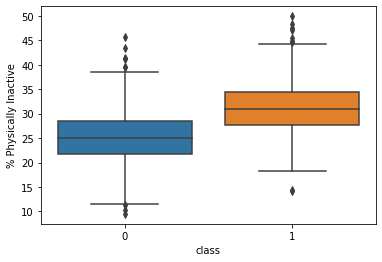

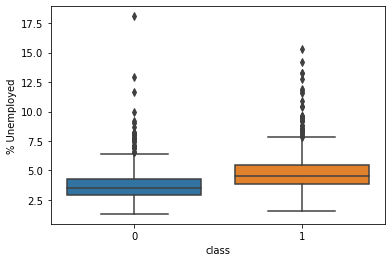

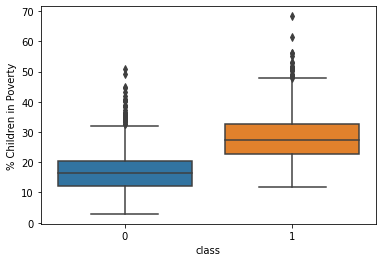

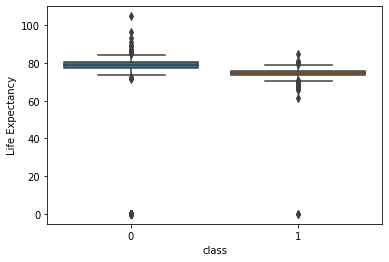

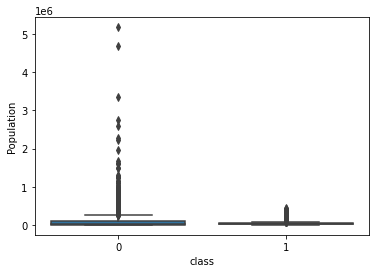

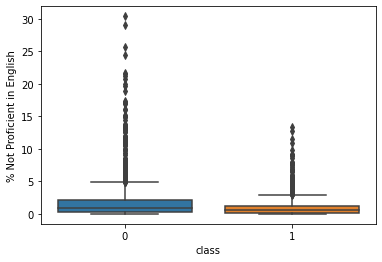

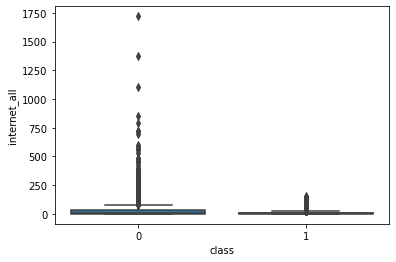

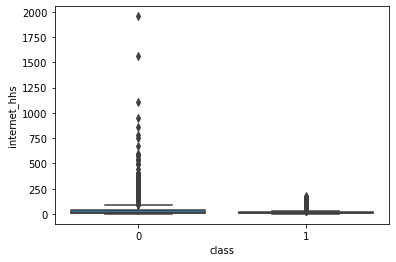

In [20]:
data1=c4[c4['class']==0]
data1_bar=c4[c4['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c41=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c41['class'].value_counts())



X=c41.drop(['class'],axis=1)
y=c41['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
#     sns.violinplot(x=y,y=X[i],data=X)

## 2nd cluster

1    1620
0    1480
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
internet_hhs
internet_all
% Non-Hispanic White
Population
Child Mortality Rate
Life Expectancy
% Severe Housing Problems
% Unemployed


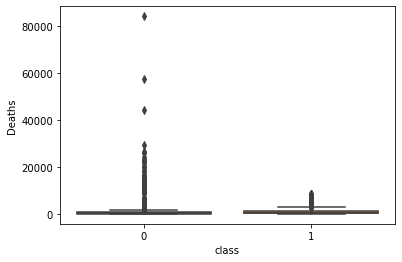

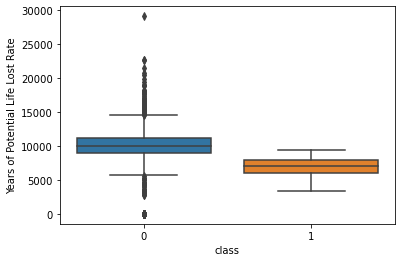

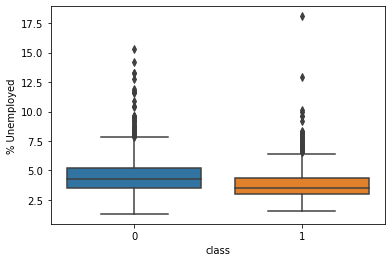

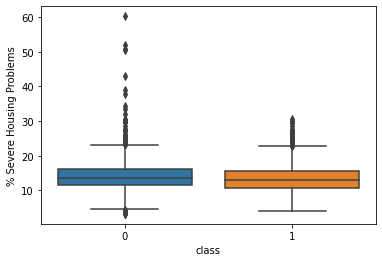

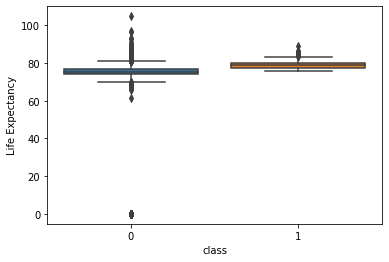

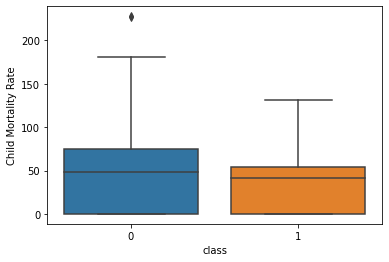

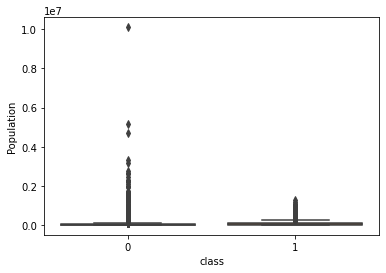

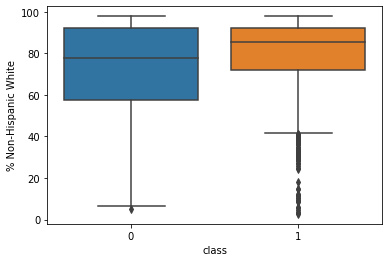

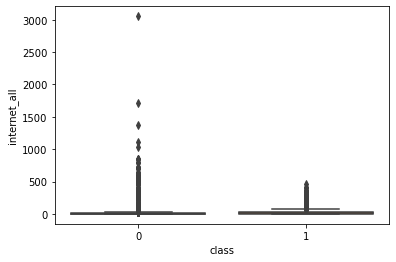

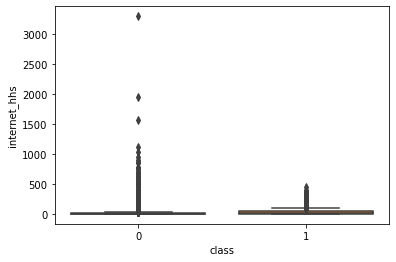

In [21]:
data1=c4[c4['class']==1]
data1_bar=c4[c4['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c42=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c42['class'].value_counts())


X=c42.drop(['class'],axis=1)
y=c42['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    69
0    69
Name: class, dtype: int64
Top features are

Deaths
%  Adults with Obesity
internet_percent
covid_deaths
covid_cases
internet_ratio
internet_hhs
Heart Disease Death Rate
Hypertension Death Rate
Food Environment Index


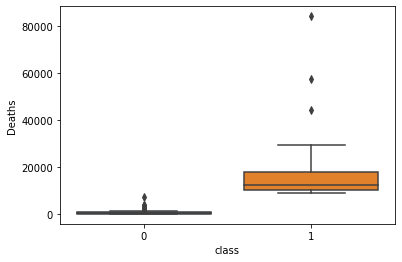

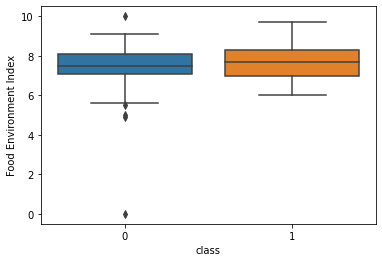

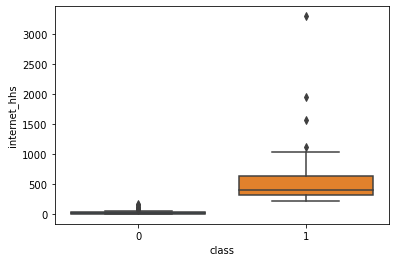

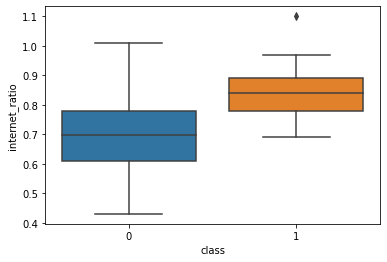

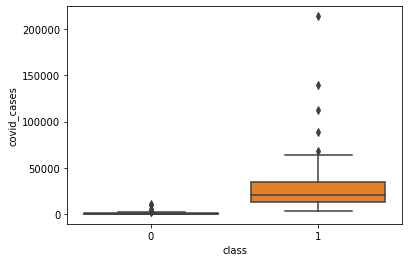

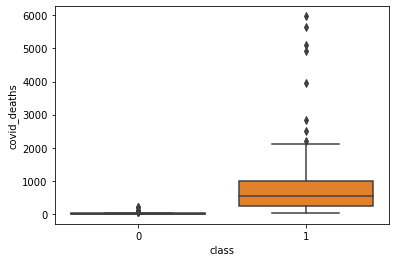

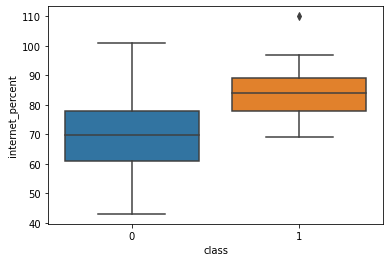

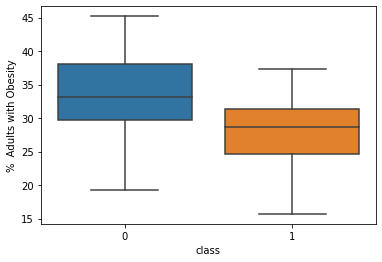

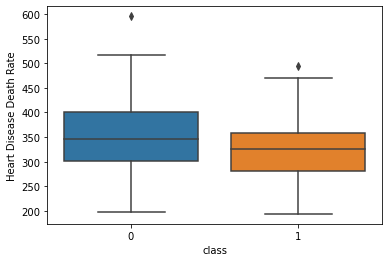

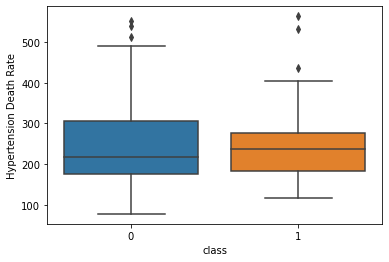

In [22]:
data1=c4[c4['class']==2]
data1_bar=c4[c4['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c43=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c43['class'].value_counts())

X=c43.drop(['class'],axis=1)
y=c43['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 4th cluster

1    278
0    278
Name: class, dtype: int64
Top features are

Deaths
% Asian
% Homeowners
% Enrolled in Free or Reduced Lunch
% Frequent Mental Distress
% Long Commute - Drives Alone
% Children in Poverty
% Unemployed
% Food Insecure
Years of Potential Life Lost Rate


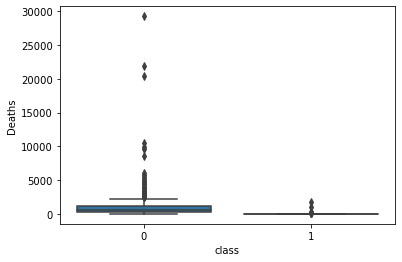

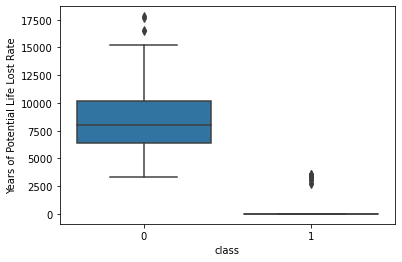

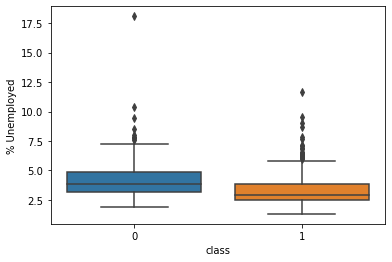

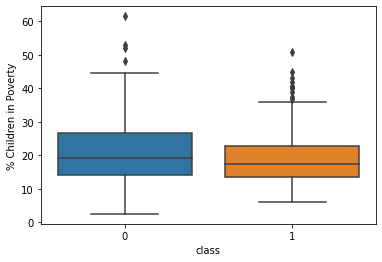

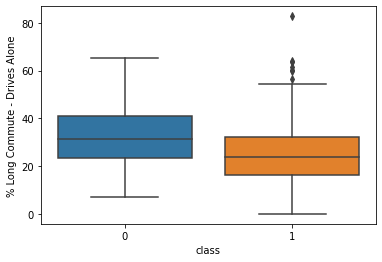

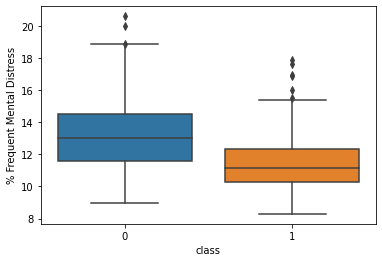

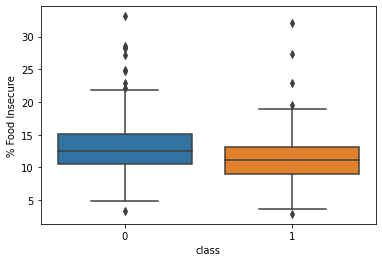

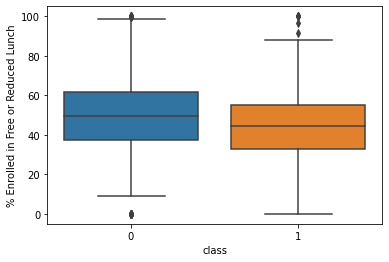

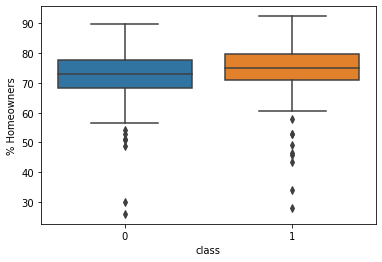

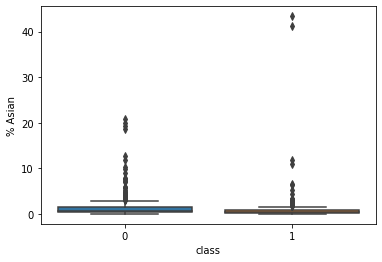

In [23]:
data1=c4[c4['class']==3]
data1_bar=c4[c4['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c44=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c44['class'].value_counts())

X=c44.drop(['class'],axis=1)
y=c44['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

# Clusters = 5


The number of entries per class are:
0    1633
2    1064
3     279
1     121
4       3
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


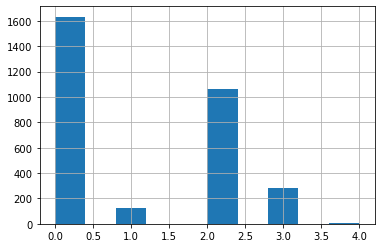

In [24]:
print("The number of entries per class are:\n{}".format(c5['class'].value_counts()),c5['class'].hist())

In [25]:
X1=c5.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c5['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c5[X1.columns[(selector.get_support())]]
print("Top features are\n{}".format(X_red.columns.to_list()))

Top features are
['Deaths', 'Years of Potential Life Lost Rate', '% Smokers', '% Children Uninsured', '% Disconnected Youth', 'Population', 'internet_consumer', 'internet_nonconsumer', 'internet_all', 'internet_hhs']


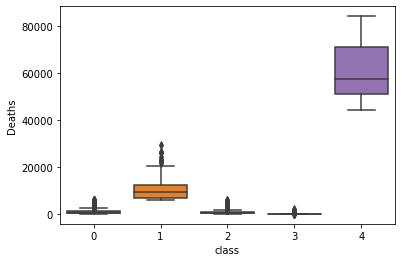

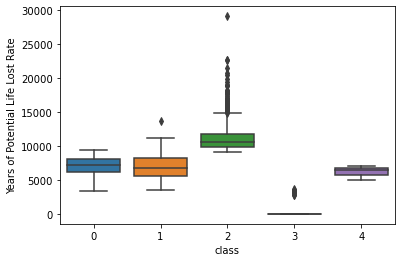

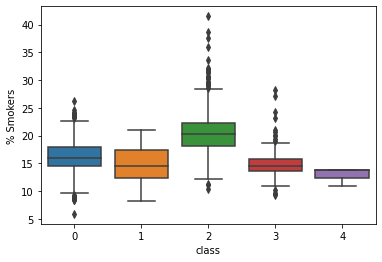

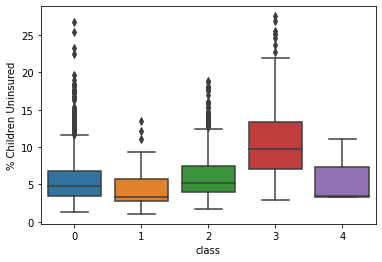

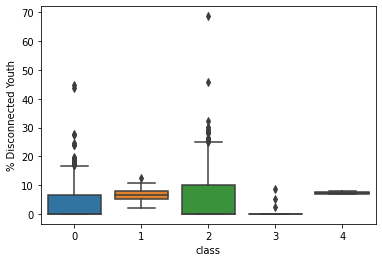

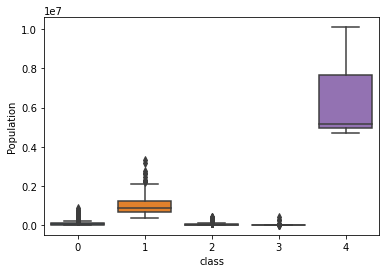

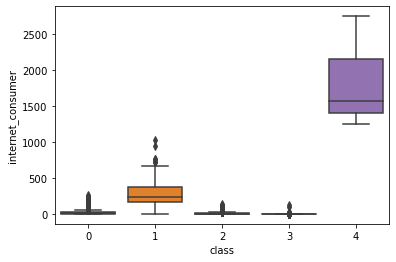

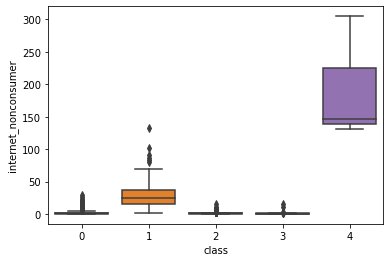

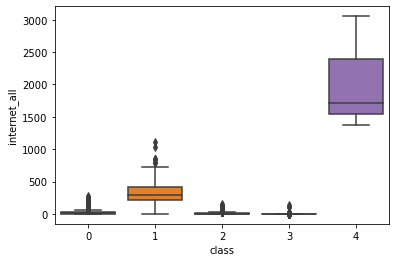

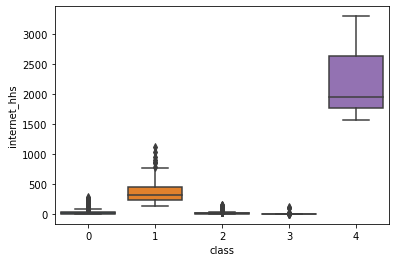

In [26]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

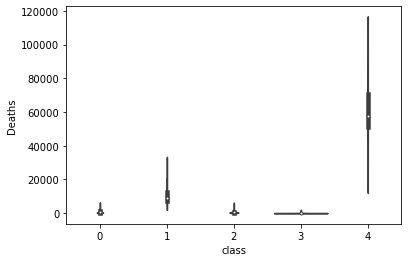

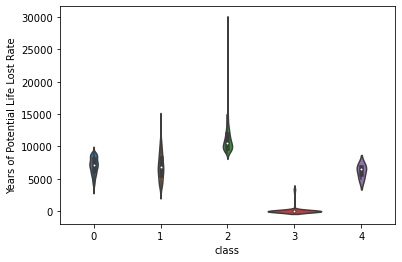

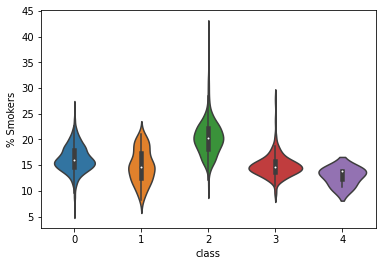

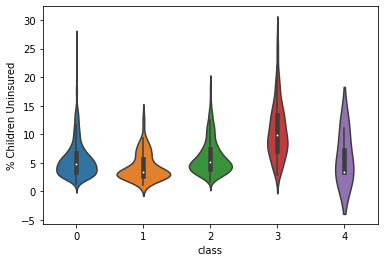

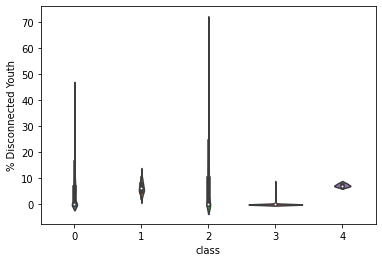

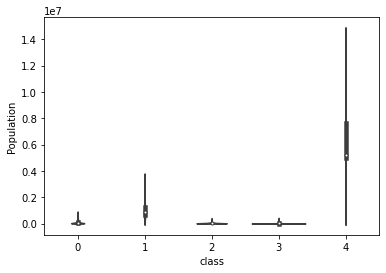

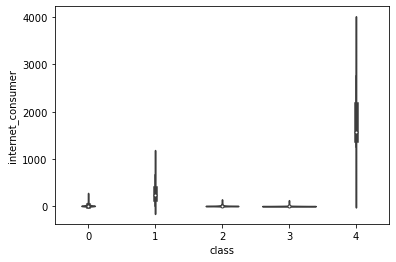

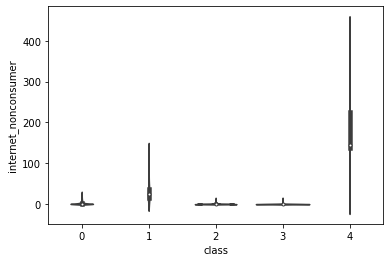

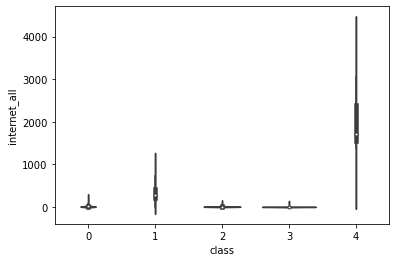

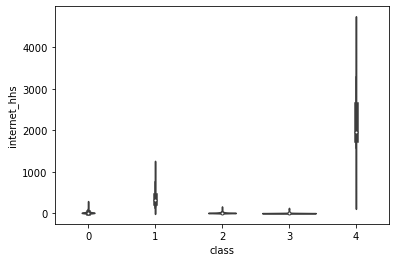

In [27]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1633
0    1467
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
covid_deaths
covid_cases
internet_all
% Children Uninsured
% Smokers
% Long Commute - Drives Alone
% Children in Poverty
% With Access to Exercise Opportunities


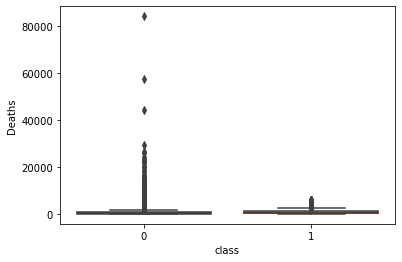

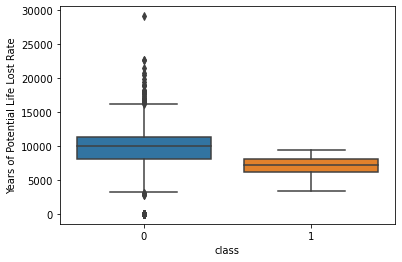

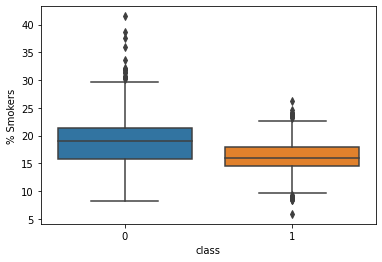

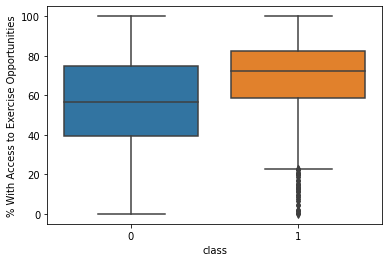

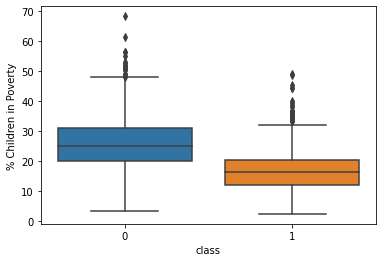

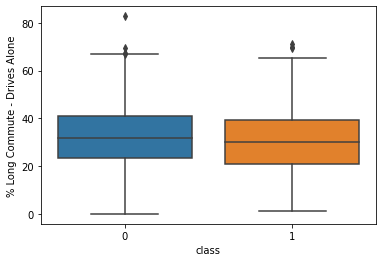

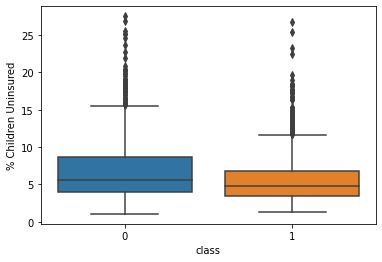

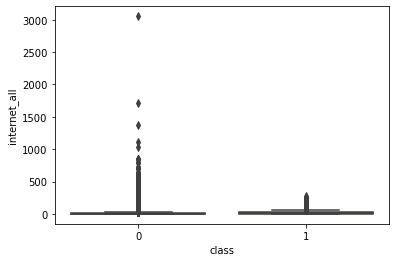

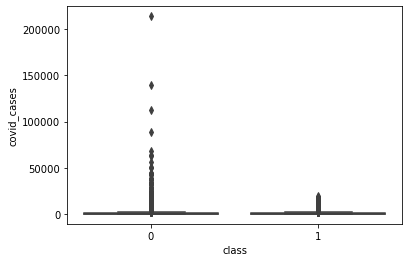

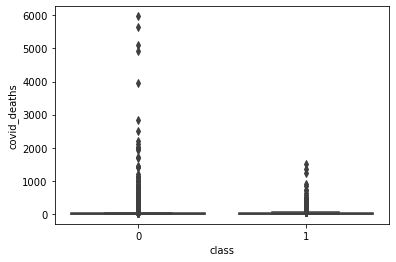

In [28]:
data1=c5[c5['class']==0]
data1_bar=c5[c5['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c51=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c51['class'].value_counts())

X=c51.drop(['class'],axis=1)
y=c51['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    121
0    121
Name: class, dtype: int64
Top features are

Deaths
internet_nonconsumer
% Severe Housing Cost Burden
% Homeowners
Juvenile Arrest Rate
Infant Mortality Rate
% Severe Housing Problems
Average Daily PM2.5
% Some College
Drug Overdose Mortality Rate


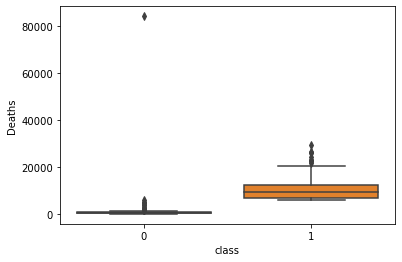

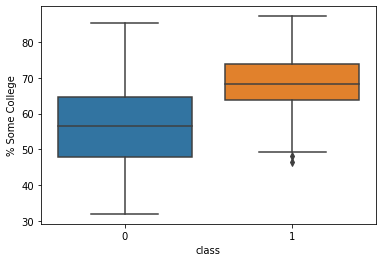

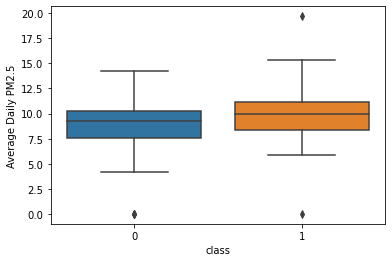

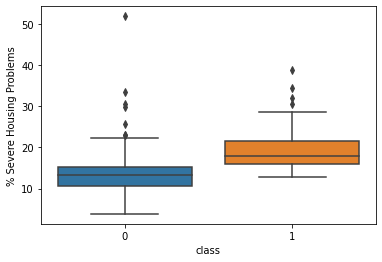

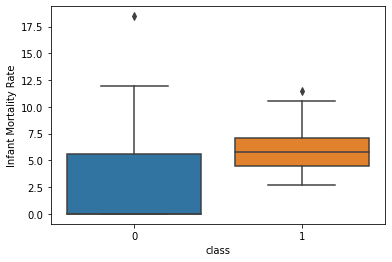

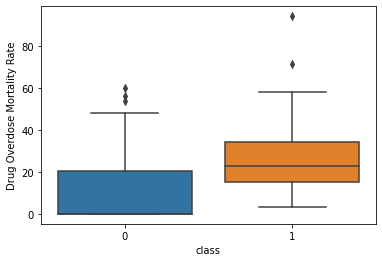

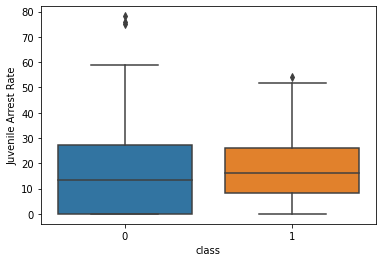

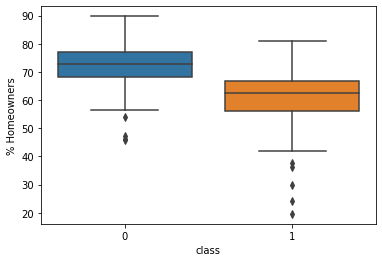

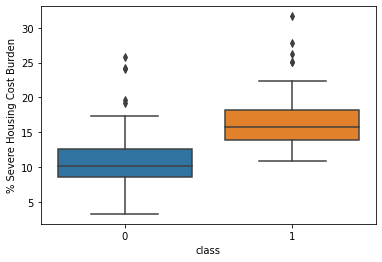

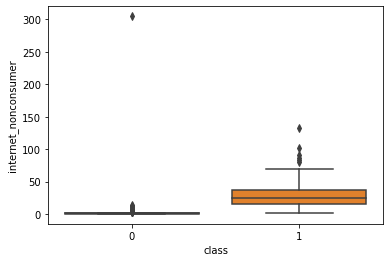

In [29]:
data1=c5[c5['class']==1]
data1_bar=c5[c5['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c52=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c52['class'].value_counts())

X=c52.drop(['class'],axis=1)
y=c52['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    1064
0    1064
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
covid_deaths
covid_cases
internet_hhs
internet_all
% Physically Inactive
Population
% Uninsured
Injury Death Rate


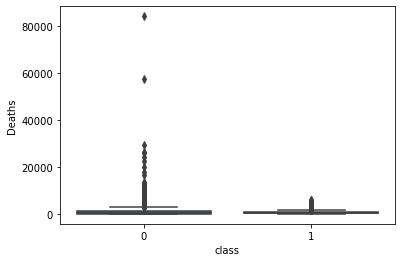

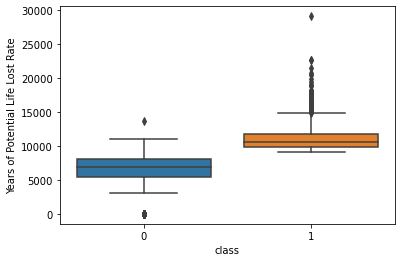

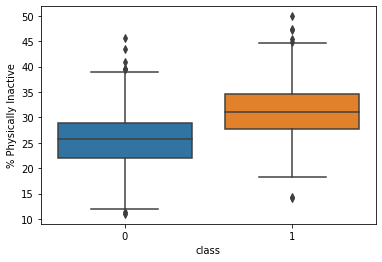

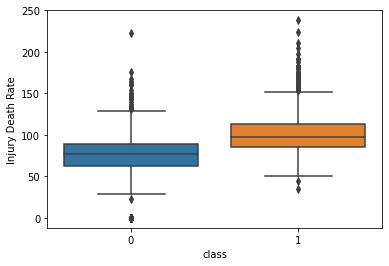

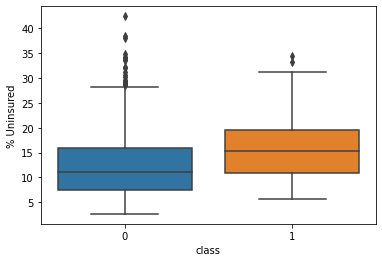

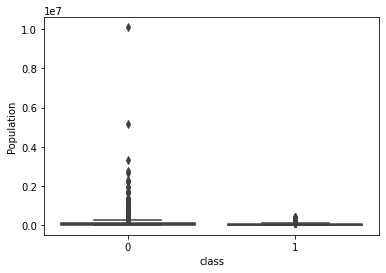

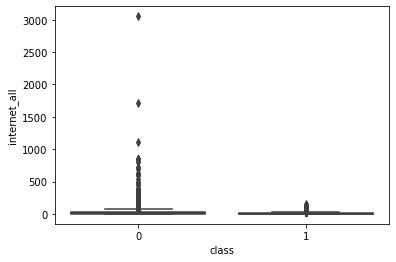

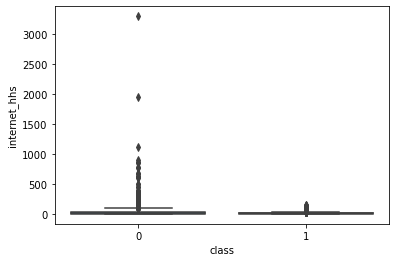

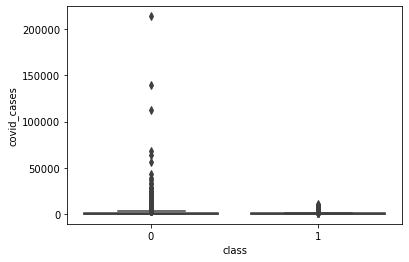

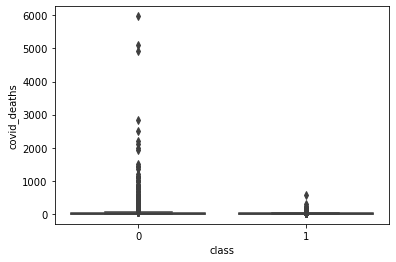

In [30]:
data1=c5[c5['class']==2]
data1_bar=c5[c5['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c53=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c53['class'].value_counts())

X=c53.drop(['class'],axis=1)
y=c53['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 4th cluster

1    279
0    279
Name: class, dtype: int64
Top features are

Deaths
% Black
% Rural
internet_hhs
internet_ratio
Teen Birth Rate
% Long Commute - Drives Alone
Years of Potential Life Lost Rate
Average Number of Physically Unhealthy Days
% Low Birthweight


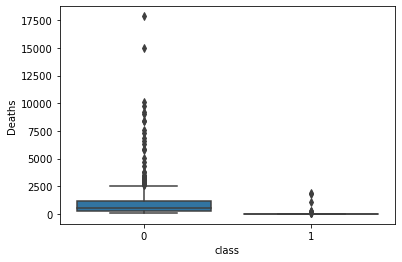

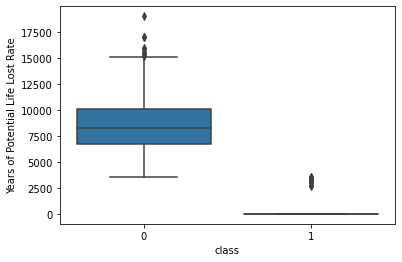

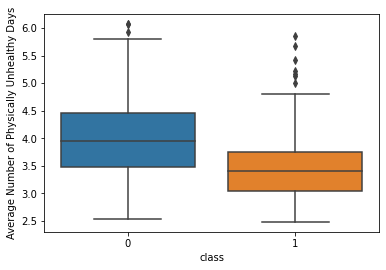

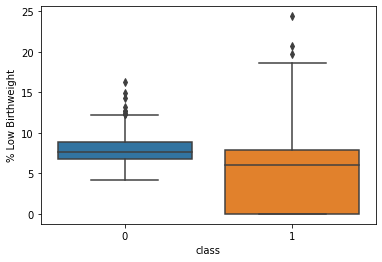

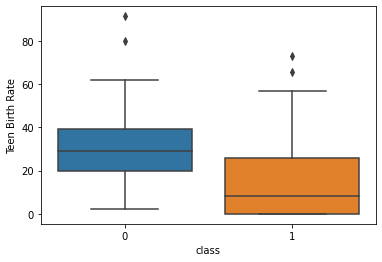

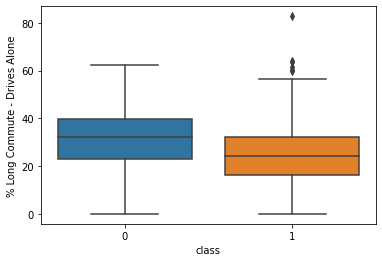

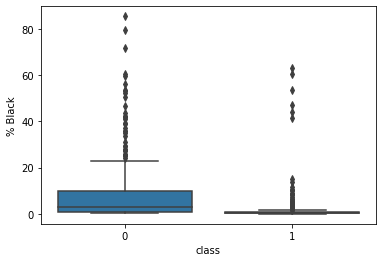

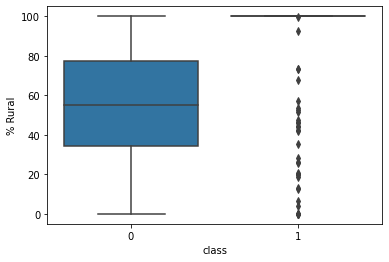

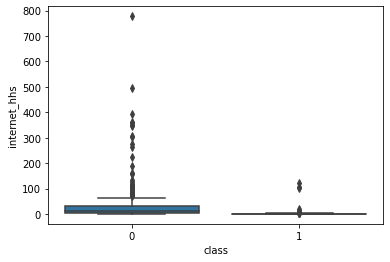

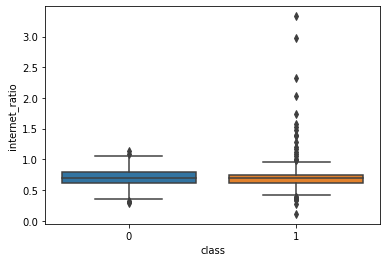

In [31]:
data1=c5[c5['class']==3]
data1_bar=c5[c5['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c54=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c54['class'].value_counts())

X=c54.drop(['class'],axis=1)
y=c54['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 5th cluster

In [32]:
data1=c5[c5['class']==4]
data1_bar=c5[c5['class']!=4]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c54=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)



"""X=c54.drop(['class'],axis=1)
y=c54['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)

for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)"""
print(c54['class'].value_counts())
print("No modelling required as only 3 features")

1    3
0    3
Name: class, dtype: int64
No modelling required as only 3 features


# Clusters = 6


The number of entries per class are:
3    1576
1    1053
0     279
2     162
4      27
5       3
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


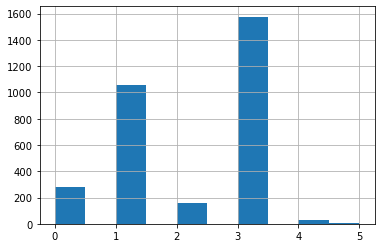

In [33]:
print("The number of entries per class are:\n{}".format(c6['class'].value_counts()),c6['class'].hist())

In [34]:
X1=c6.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c6['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c6[X1.columns[(selector.get_support())]]
print("Top features are\n{}".format(X_red.columns.to_list()))

Top features are
['Deaths', 'Years of Potential Life Lost Rate', 'Injury Death Rate', 'Age-Adjusted Death Rate', '% Children Uninsured', 'Population', '% Not Proficient in English', 'internet_consumer', 'internet_nonconsumer', 'covid_cases']


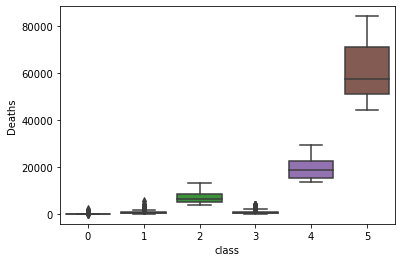

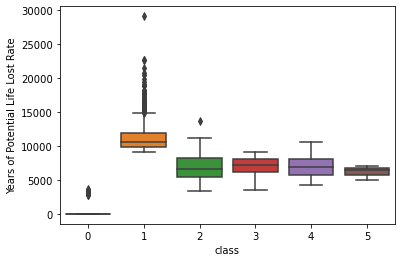

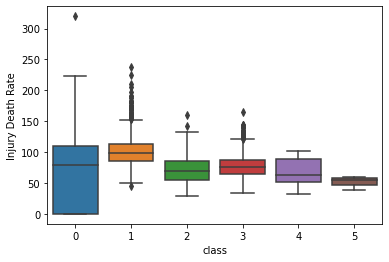

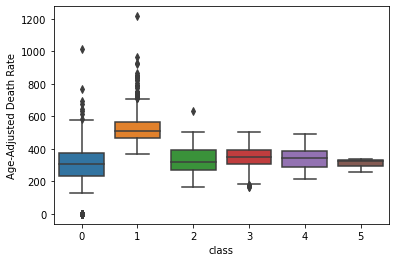

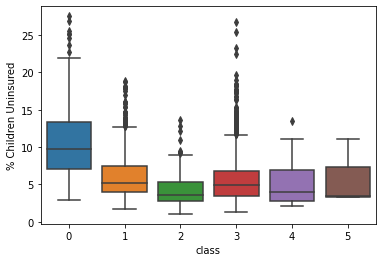

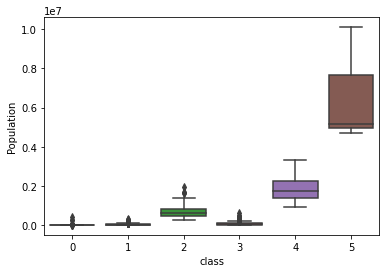

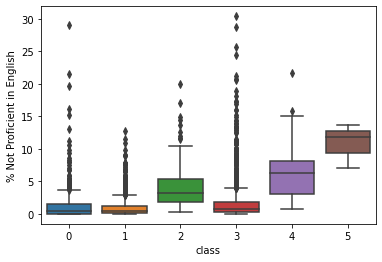

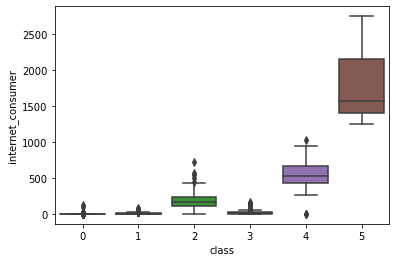

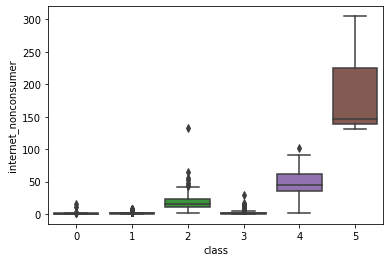

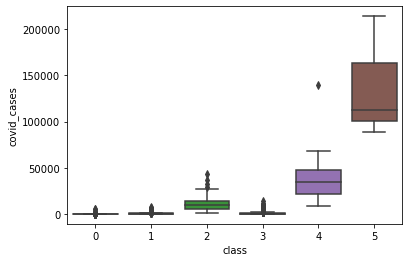

In [35]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

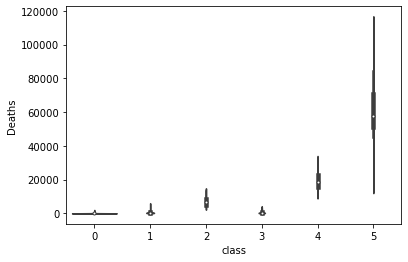

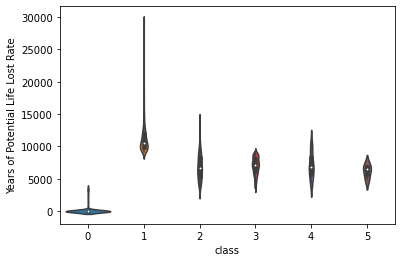

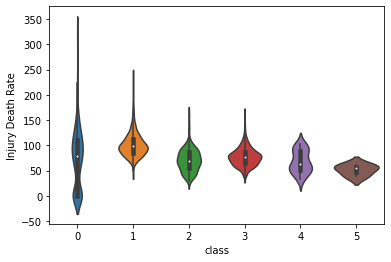

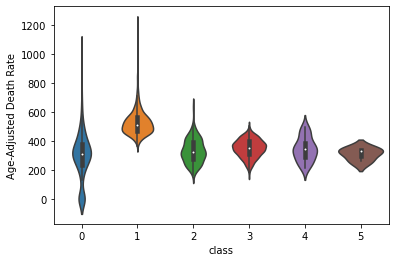

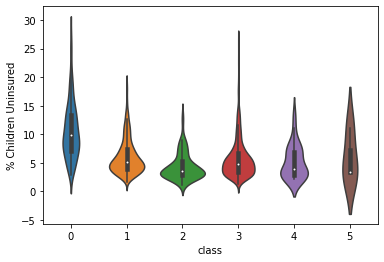

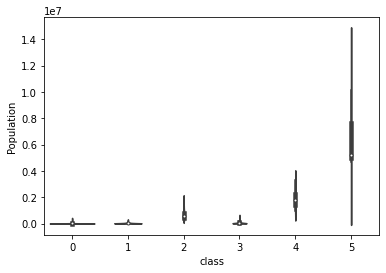

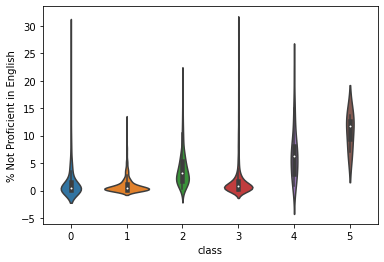

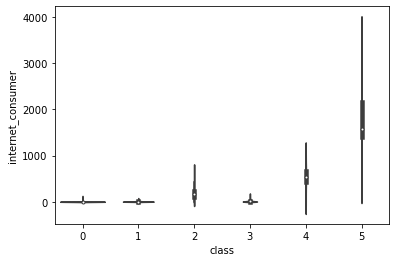

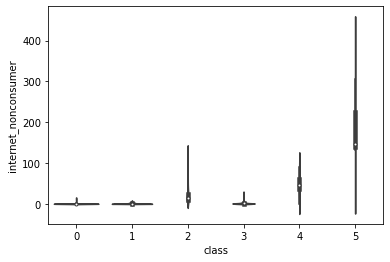

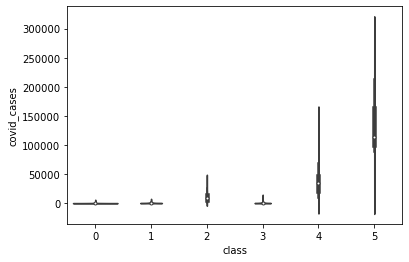

In [36]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    279
0    279
Name: class, dtype: int64
Top features are

Deaths
Motor Vehicle Mortality Rate
% Enrolled in Free or Reduced Lunch
% Driving Deaths with Alcohol Involvement
% Unemployed
Injury Death Rate
Average Number of Physically Unhealthy Days
% Fair or Poor Health
Years of Potential Life Lost Rate
% Low Birthweight


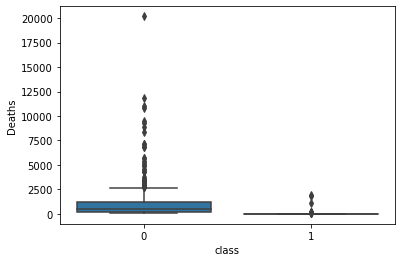

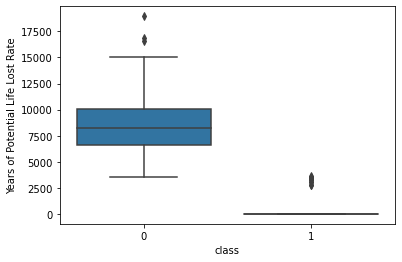

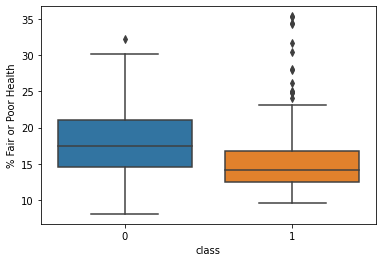

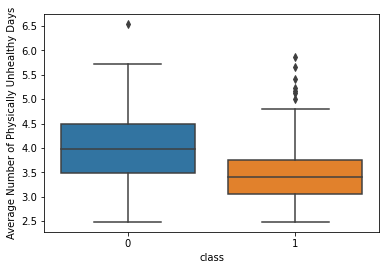

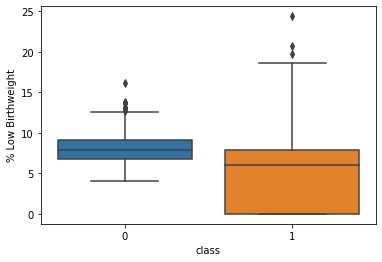

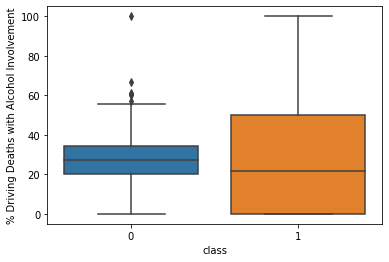

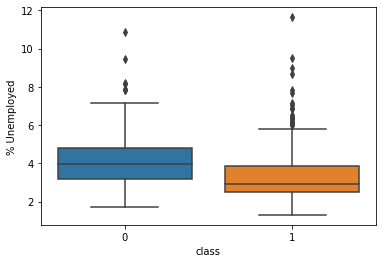

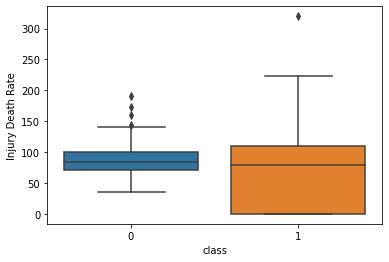

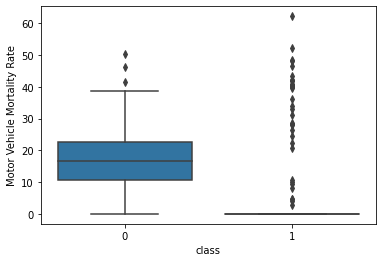

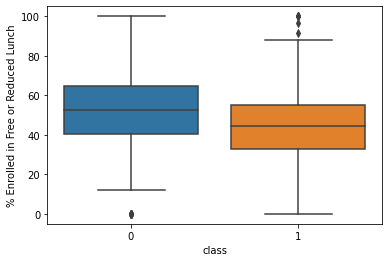

In [37]:
data1=c6[c6['class']==0]
data1_bar=c6[c6['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c61=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c61['class'].value_counts())

X=c61.drop(['class'],axis=1)
y=c61['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    1053
0    1053
Name: class, dtype: int64
Top features are

Deaths
% Black
% Children in Poverty
% Enrolled in Free or Reduced Lunch
Population
internet_consumer
Age-Adjusted Death Rate
Years of Potential Life Lost Rate
internet_all
Average Number of Physically Unhealthy Days


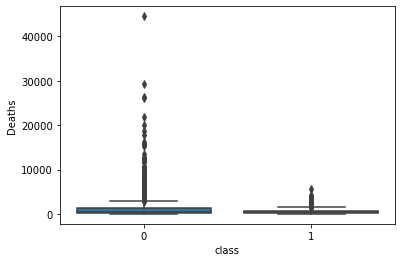

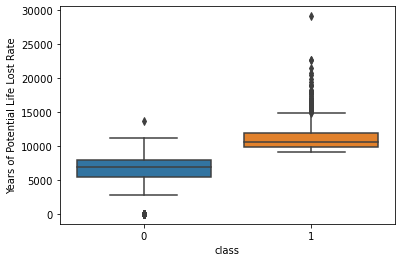

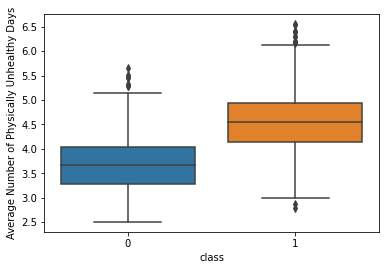

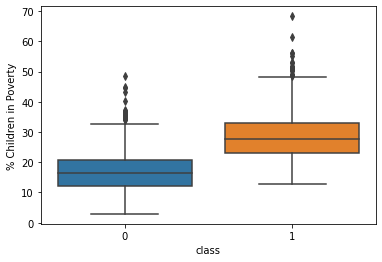

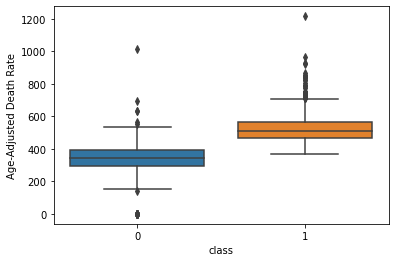

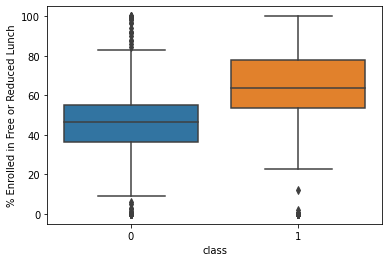

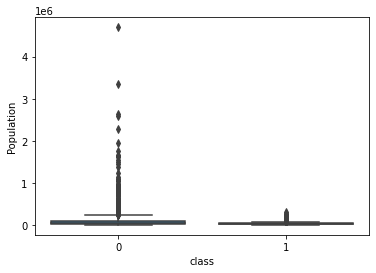

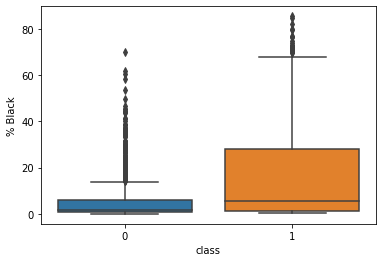

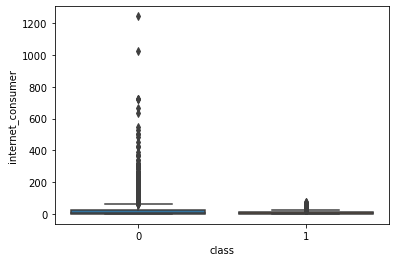

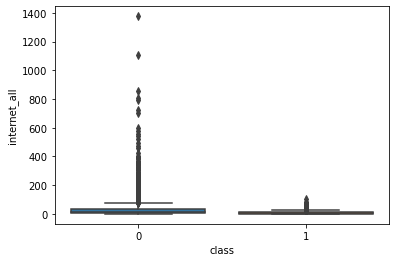

In [38]:
data1=c6[c6['class']==1]
data1_bar=c6[c6['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c62=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c62['class'].value_counts())

X=c62.drop(['class'],axis=1)
y=c62['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    162
0    162
Name: class, dtype: int64
Top features are

Deaths
internet_consumer
covid_cases
covid_deaths
Motor Vehicle Mortality Rate
% Vaccinated
Black/White Segregation Index
non-White/White Segregation Index
Population
% Hispanic


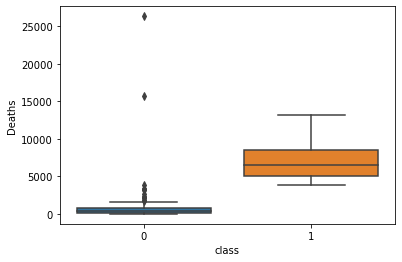

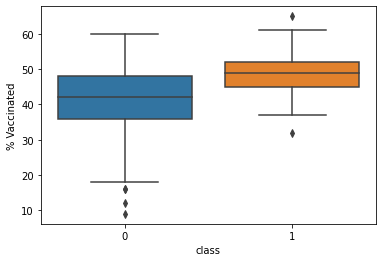

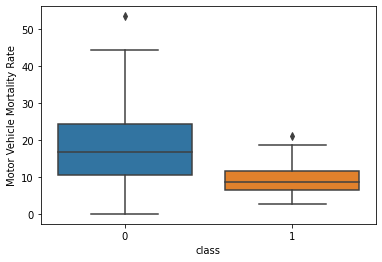

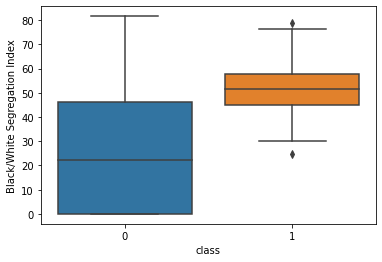

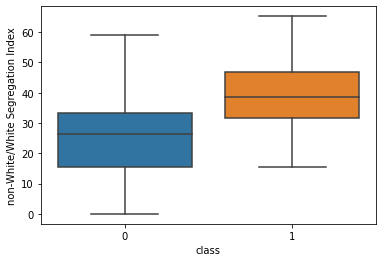

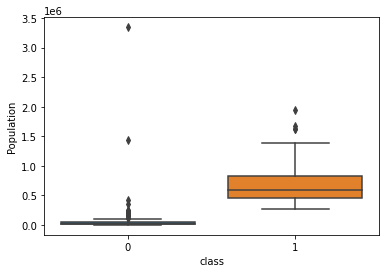

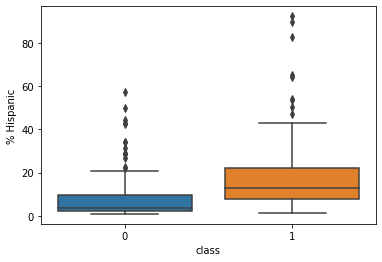

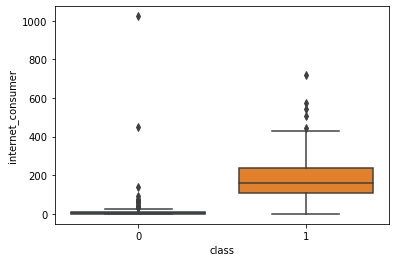

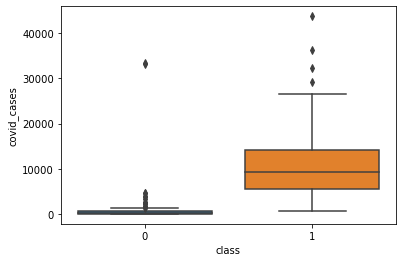

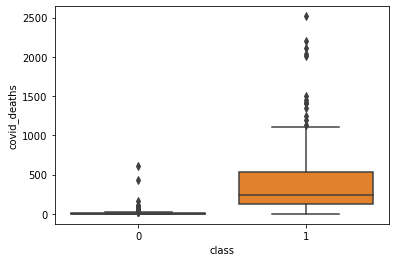

In [39]:
data1=c6[c6['class']==2]
data1_bar=c6[c6['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c63=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c63['class'].value_counts())

X=c63.drop(['class'],axis=1)
y=c63['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 4th cluster

1    1576
0    1524
Name: class, dtype: int64
Top features are

Deaths
% Enrolled in Free or Reduced Lunch
% Severe Housing Problems
% Driving Deaths with Alcohol Involvement
% Physically Inactive
% Female
% Not Proficient in English
internet_hhs
% Fair or Poor Health
Years of Potential Life Lost Rate


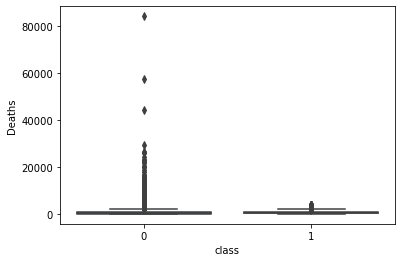

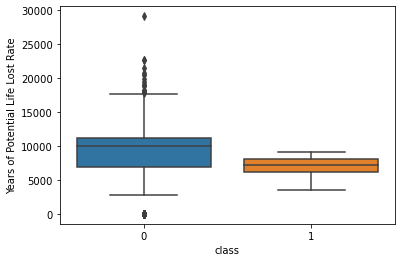

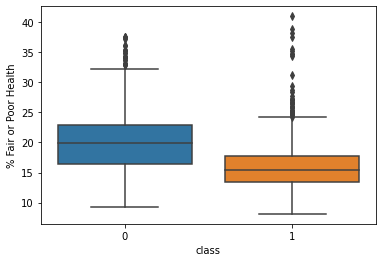

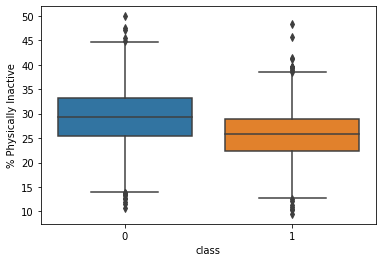

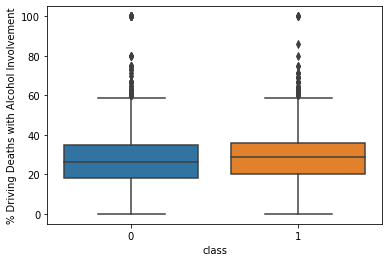

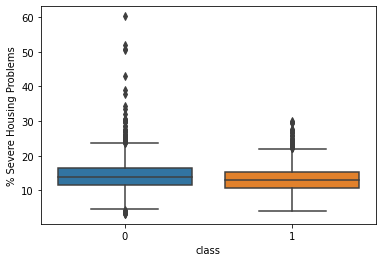

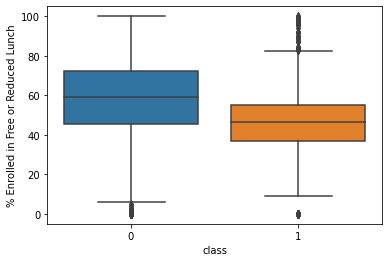

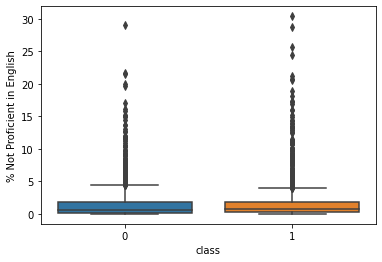

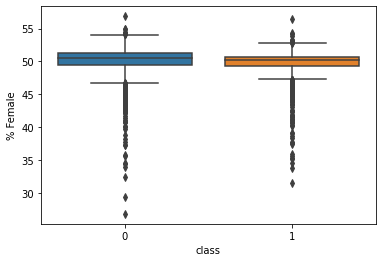

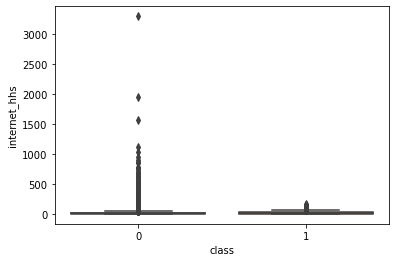

In [40]:
data1=c6[c6['class']==3]
data1_bar=c6[c6['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c64=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)

print(c64['class'].value_counts())

X=c64.drop(['class'],axis=1)
y=c64['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 5th cluster

1    27
0    27
Name: class, dtype: int64
Top features are

Deaths
internet_ratio
% Hispanic
% Severe Housing Cost Burden
% Frequent Mental Distress
% Some College
Dentist Rate
% With Access to Exercise Opportunities
Drug Overdose Mortality Rate
Average Number of Physically Unhealthy Days


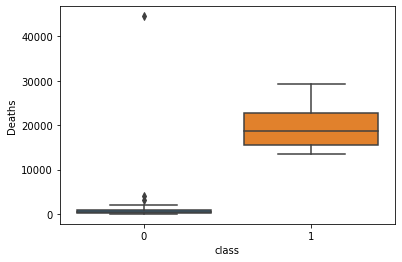

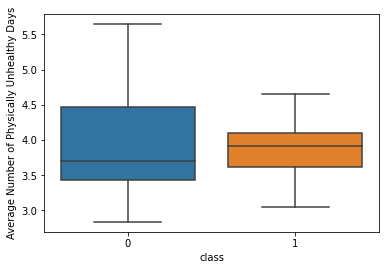

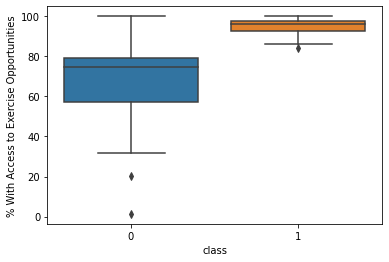

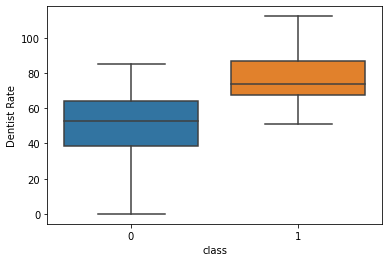

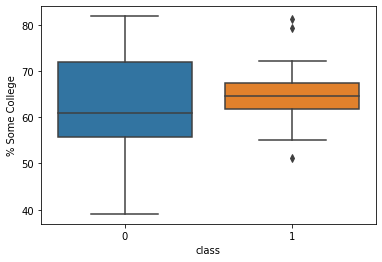

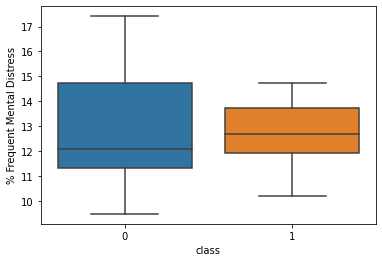

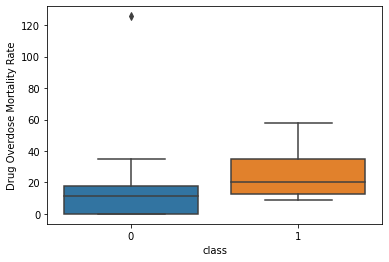

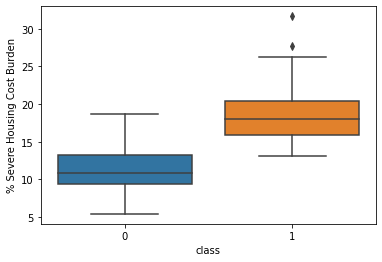

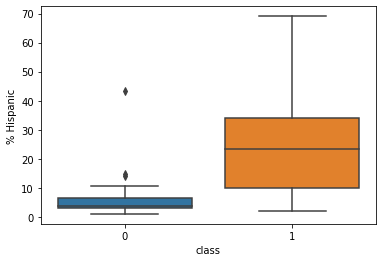

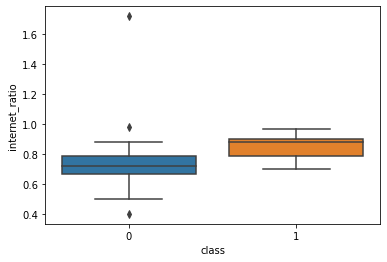

In [41]:
data1=c6[c6['class']==4]
data1_bar=c6[c6['class']!=4]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c65=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c65['class'].value_counts())

X=c65.drop(['class'],axis=1)
y=c65['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 6th cluster

In [42]:
data1=c6[c6['class']==5]
data1_bar=c6[c6['class']!=5]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c66=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c66['class'].value_counts())
print("only 3 data points so no modelling required")

1    3
0    3
Name: class, dtype: int64
only 3 data points so no modelling required
